# Problem Statement
## Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.
### Draw the inferences from the clusters obtained.

+ Clustering analysis is an unsupervised learning method that separates the data points into several specific bunches or groups, such that the data points in the same groups have similar properties and data points in different groups have different properties in some sense.

+ It comprises of many different methods based on different distance measures. E.g. K-Means (distance between points), Affinity propagation (graph distance), Mean-shift (distance between points), DBSCAN (distance between nearest points), Gaussian mixtures (Mahalanobis distance to centers), Spectral clustering (graph distance), etc.

+ Centrally, all clustering methods use the same approach i.e. first we calculate similarities and then we use it to cluster the data points into groups or batches. Here we will focus on the Density-based spatial clustering of applications with noise (DBSCAN) clustering method.

## 0.1 Table of Contents<a class="anchor" id="0.1"></a>

1. [Content](#1)
    - 1.1 [About the Dataset](#1.1)
2. [Data Exploration](#2)
    - 2.1 [Missing Values](#2.1)
3. [Exploratory Data Analysis](#3)
    - 3.1 [Outlier Detection](#3.1)
4. [Data Visualization](#4)
    - 4.1 [Murder Rate State-Wise](#4.1)
    - 4.2 [Assault Rate State-Wise](#4.2)
    - 4.3 [Rape Rate State-Wise](#4.3)
    - 4.4 [Urban Rate State-Wise](#4.4)
5. [Data Pre-processing](#5)
    - 5.1 [Standardizing the Data](#5.1)
    - 5.2 [Normalizing the Data](#5.2)
6. [KMeans Clustering](#6)
    - 6.1 [Elbow Method for Determining Cluster Amount on Standard Scaled Data](#6.1)
    - 6.2 [Silhoutte Score](#6.2)
    - 6.3 [Build KMeans Cluster algorithm using K=3 and Standard Scaler Applied Dataset](#6.3)
    - 6.4 [Elbow Method and Silhouette Score on MinMaxScaler Applied Data](#6.4)
    - 6.5 [Build KMeans Cluster algorithm using K=2 and MinMaxScaler Applied Dataset](#6.5)
7. [Hierarchical Clustering Algorithm](#7)
    - 7.1 [Dendogram on MinMaxScaler Applied on Dataset](#7.1)
    - 7.2 [Dendrogram on Standard Scaler Applied on Data](#7.2)
    - 7.3 [Run Hierarchical Clustering.(Agglomerative Clustering) on MinMax Scaled Data)](#7.3)
8. [DBSCAN - (Density Based Spatial Clustering of Applications with Noise)](#8)
    - 8.1 [DBSCAN of Standard Scaled Data](#8.1)
    - 8.2 [DBSCAN of MinMax Scaled Data](#8.2)
9. [Conclusion](#9)

In [26]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

In [27]:
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [28]:
# Data display customization

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

## 1. Content
This data set contains statistics, in arrests per 100,000 residents for assault, murder, and rape in each of the 50 US states in 1973. Also given is the percent of the population living in urban areas.This is a systematic approach for identifying and analyzing patterns and trends in crime using USArrest dataset.

A data frame with 50 observations on 4 variables.

+ Murder is numeric and Murder arrests (per 100,000)
+ Assault is numeric and Assault arrests (per 100,000)
+ UrbanPop is numeric and UrbanPop arrests (per 100,000)
+ Rape is numeric and Rape arrests (per 100,000)

In [76]:
# Importing dataset
data = pd.read_csv(r"C:\Users\DELL\Downloads\crime_data.csv")
print(data.shape)
data.head()

(50, 5)


,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [77]:
#Renaming the Unnamed: 0 Column into States
data.rename({'Unnamed: 0':'States'}, axis=1, inplace=True)
data.head(10)

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


## 2. Data Exploration <a class="anchor" id="2"></a>

#### Descriptive Statistics

In [78]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


### 2.1 Missing Values <a class="anchor" id="2.1"></a>

In [80]:
# As a part of the Data cleansing we check the data for any missing/ na values
# null count for columns

null_count_col = data.isnull().sum().value_counts(ascending=False)

# null percentage for columns

null_percent_col = (data.isnull().sum() * 100 / len(data)).value_counts(ascending=False)

print("Null Count for Columns:\n\n", null_count_col, "\n")
print("Null Percentage for Columns:\n\n", null_percent_col)

Null Count for Columns:

 0    5
dtype: int64 

Null Percentage for Columns:

 0.0    5
dtype: int64


In [81]:
# null count for rows

null_count_row = data.isnull().sum(axis=1).value_counts(ascending=False)

# null percentage for rows

null_percent_row = (data.isnull().sum(axis=1) * 100 / len(data)).value_counts(ascending=False)

print("Null Count for Rows:\n\n", null_count_row, "\n")
print("Null Percentage for Rows:\n\n", null_percent_row)

Null Count for Rows:

 0    50
dtype: int64 

Null Percentage for Rows:

 0.0    50
dtype: int64


### Duplicated Values

#### print the duplicated rows

In [82]:
# Additionally we check the data for any duplicate values, now this can be an optional check depending on the data being used
data.duplicated().sum()

0

In [84]:
data[data.duplicated()]

,States,Murder,Assault,UrbanPop,Rape


#### There are no missing / Null and Duplicated  values  either in columns or rows, so we can move on to the next step, which is Exploratory Data Analysis.

## 3. Exploratory Data Analysis<a class="anchor" id="3"></a>

[Table of Content](#0.1)

### Lets analyze the features by creating histograms to understand the distribution

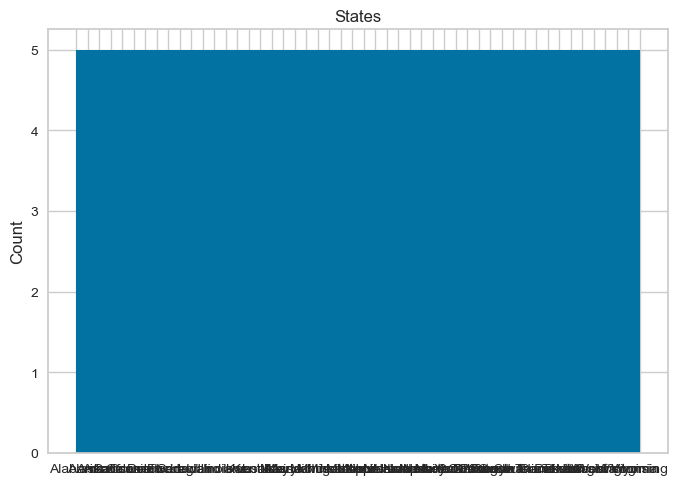

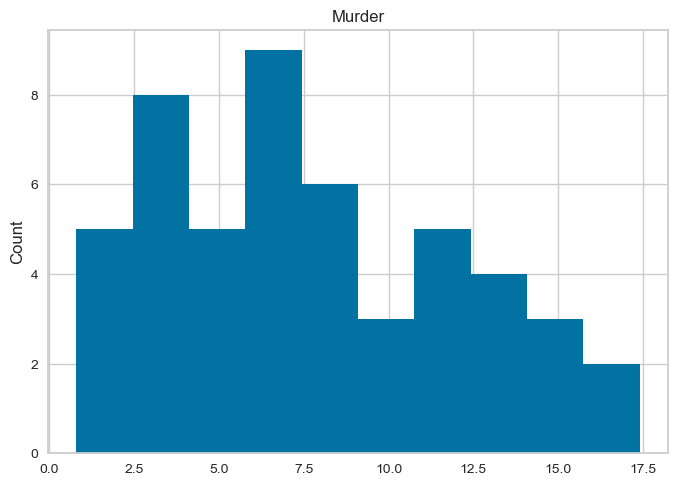

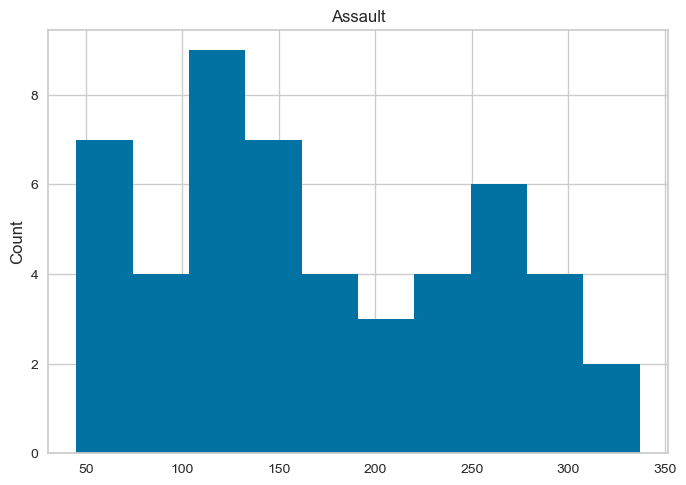

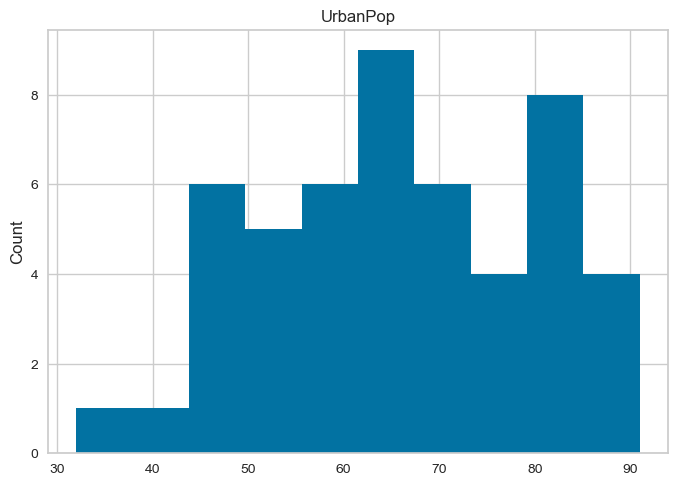

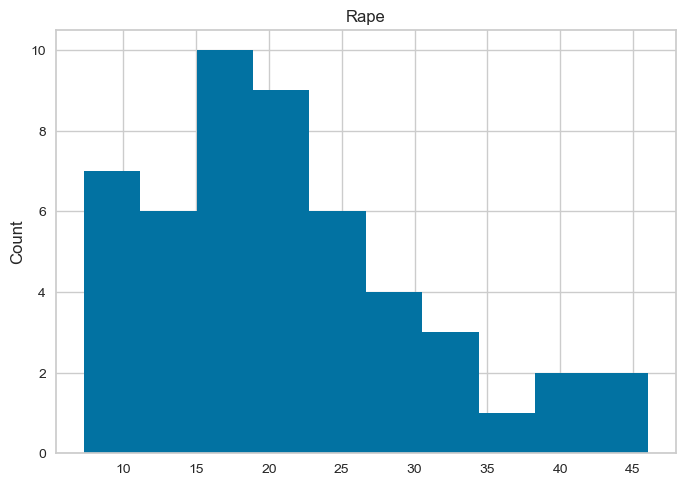

In [85]:
for feature in data.columns:
    data=data.copy()
    data[feature].hist(bins=10)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

### 3.1 Outliers Detection<a class="anchor" id="3.1"></a>

In [86]:
data.columns

Index(['States', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

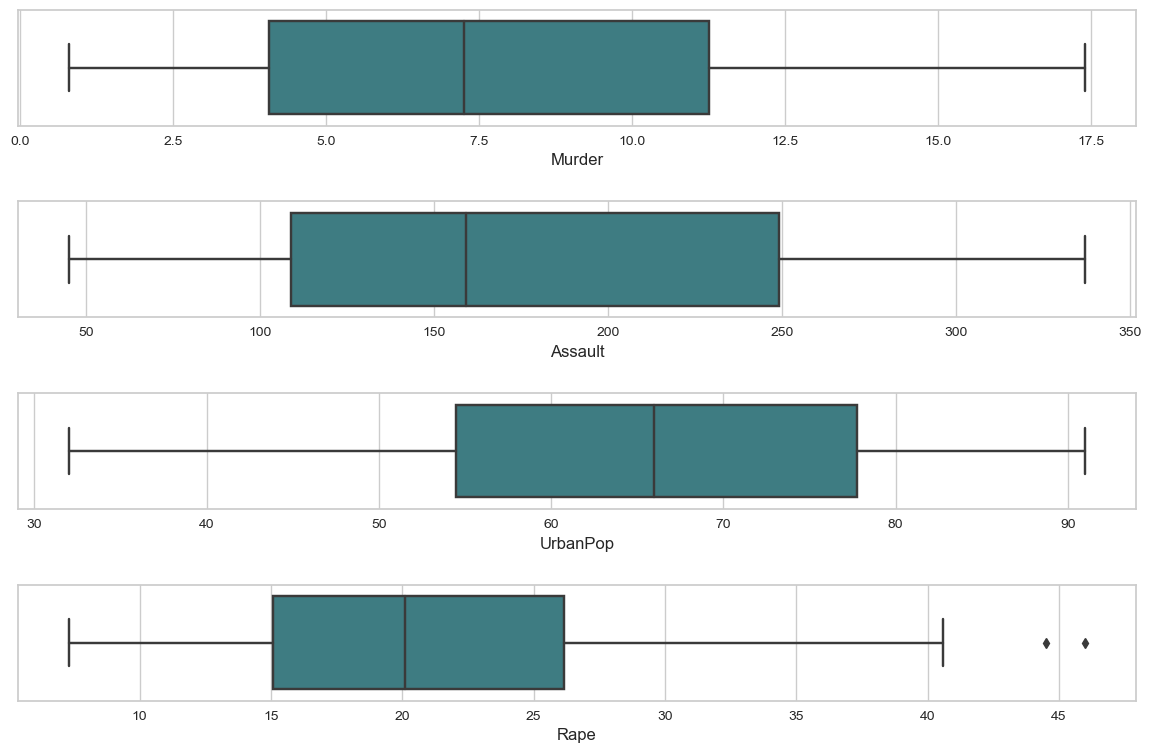

In [87]:
ot=data.copy() 
fig, axes=plt.subplots(4,1,figsize=(12,8),sharex=False,sharey=False)
sns.boxplot(x='Murder',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='Assault',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='UrbanPop',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='Rape',data=ot,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

<Axes: >

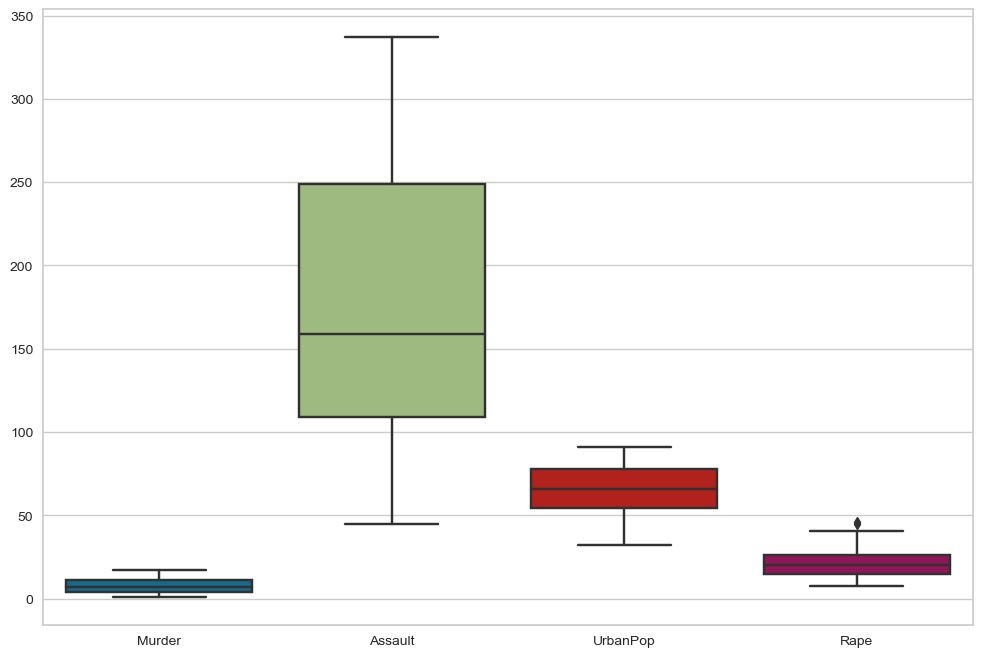

In [88]:
# Box plot for every feature in the same graph

plt.figure(figsize=(12,8))
sns.boxplot(data=data)

In [89]:
# we use sqrt() to see more clearly despite the outliers

plt.figure(figsize=(12,8))
sns.boxplot(data=np.sqrt(data))

TypeError: loop of ufunc does not support argument 0 of type str which has no callable sqrt method

<Figure size 1200x800 with 0 Axes>

## 4. Data Visualization<a class="anchor" id="4"></a>

[Table of Contents](#0.1)

In [ ]:
# correlation heatmap

f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(data.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

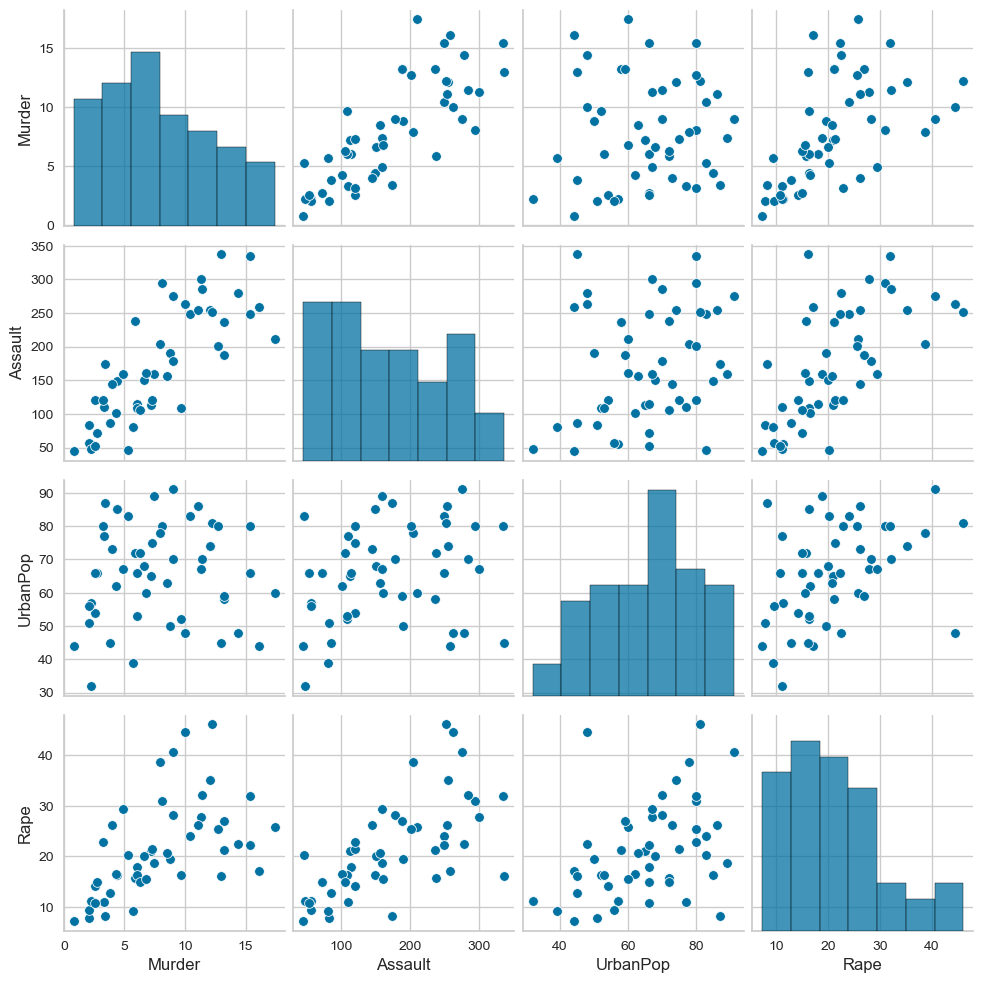

In [90]:
sns.pairplot(data)

Unique points in this correlation matrix:

+ Assault is positively correlated with Murder
+ Assualt is positively correlated with Rape
+ Rape is positively correlated with Murder

### 4.1 Murder Rate<a class="anchor" id="4.1"></a>

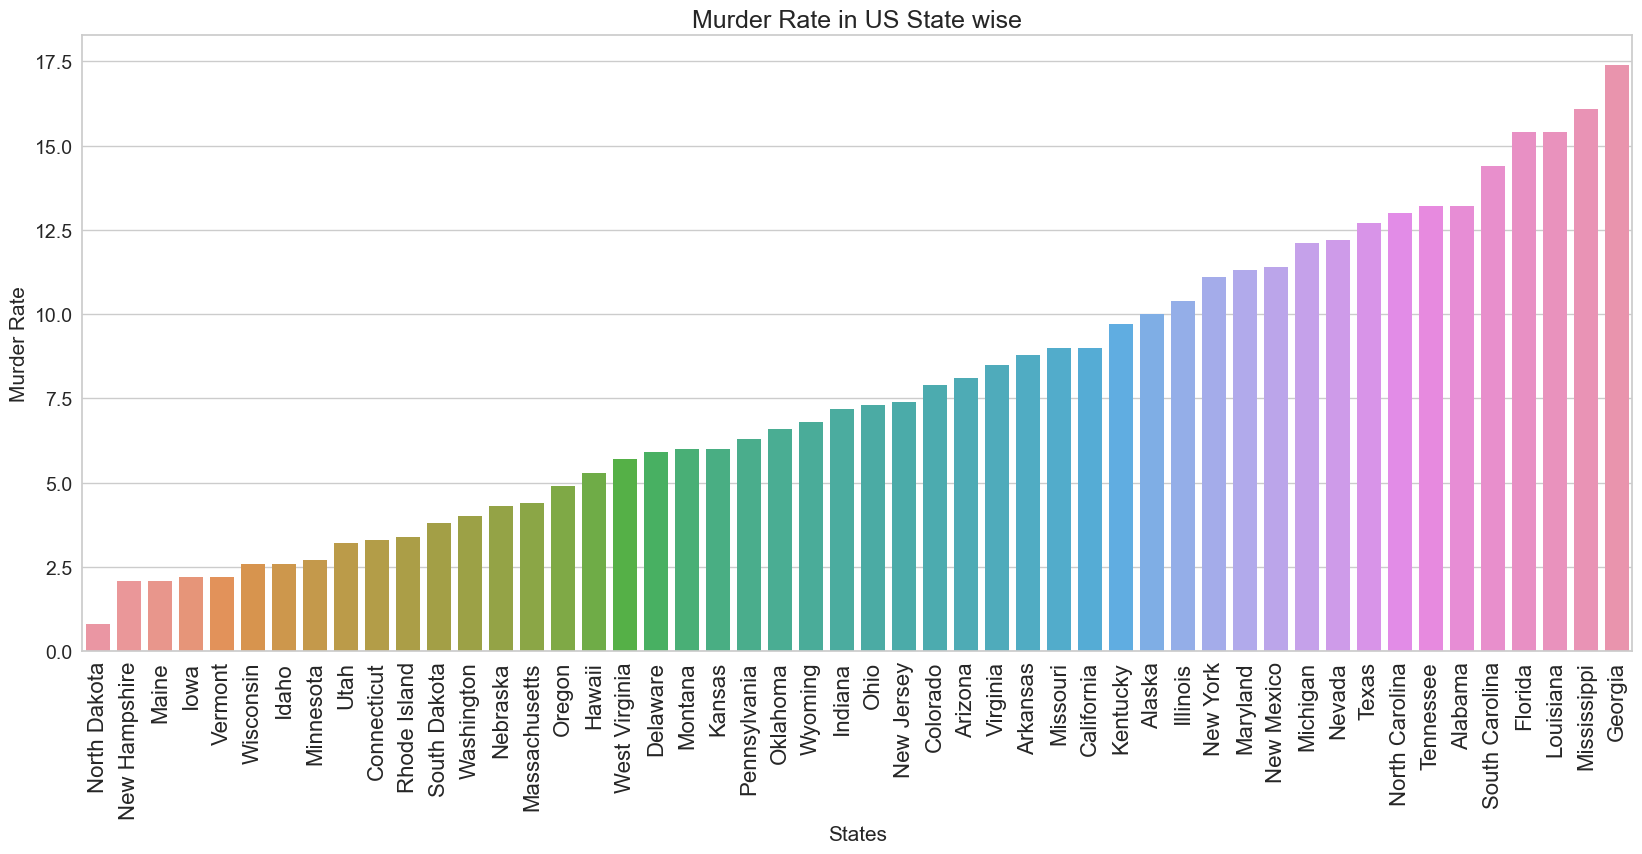

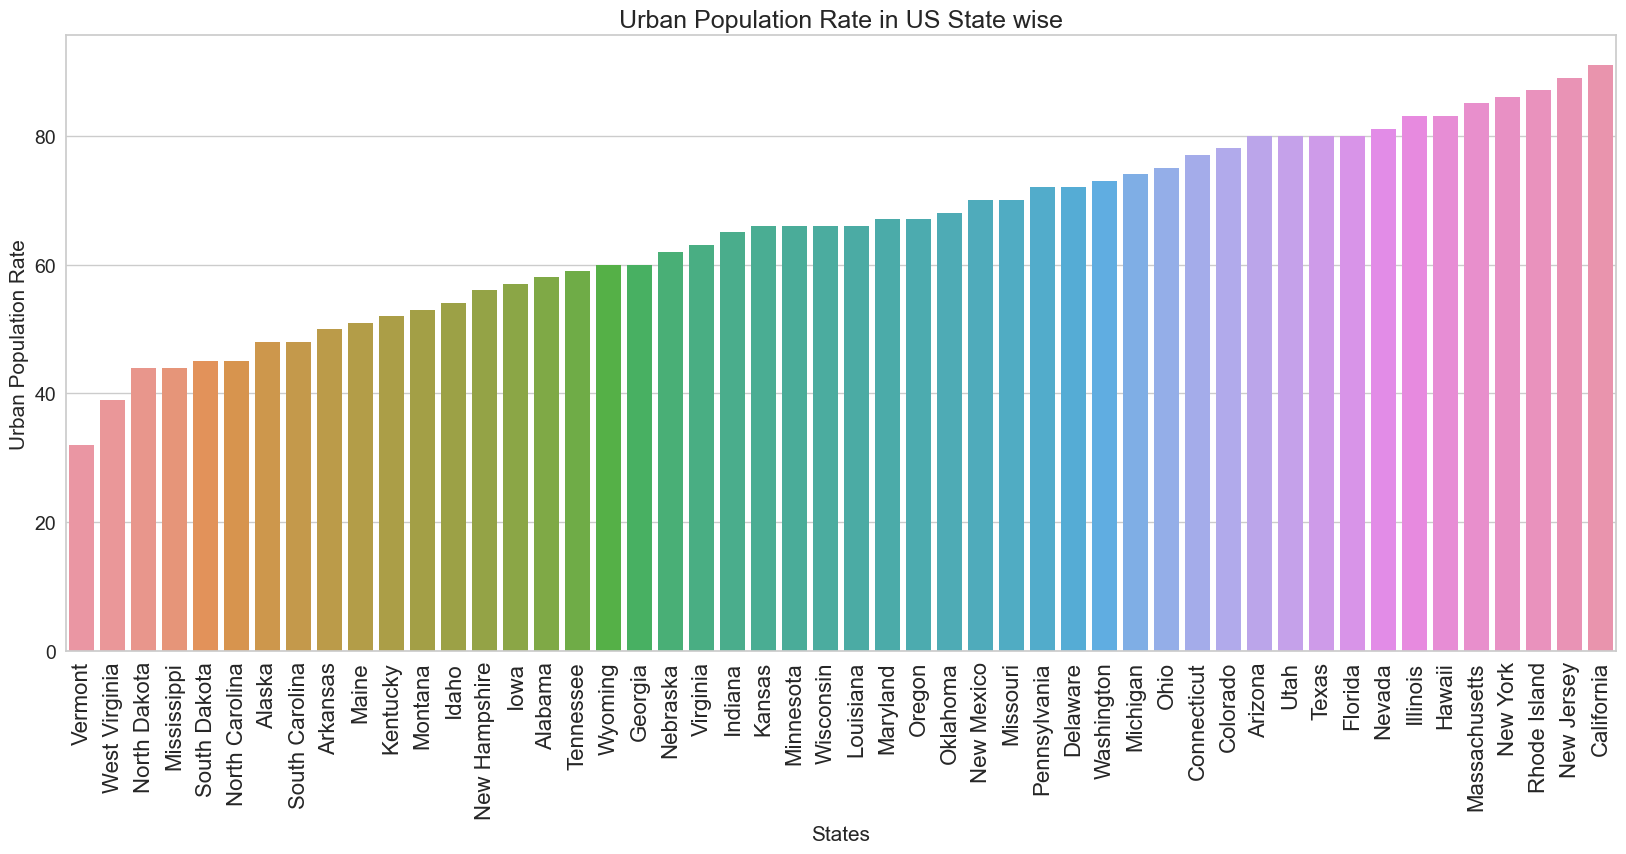

In [91]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='States',
            y="Murder", 
            data=data, 
            order=data.sort_values('Murder').States)
# set labels
plt.xlabel("States", size=15)
plt.ylabel("Murder Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Murder Rate in US State wise", size=18)
plt.show()

plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='States',
            y="UrbanPop", 
            data=data, 
            order=data.sort_values('UrbanPop').States)
# set labels
plt.xlabel("States", size=15)
plt.ylabel("Urban Population Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Urban Population Rate in US State wise", size=18)
plt.show()

#### Observation: There is no direct relation between Murder Rate and Urban Population but you can see a less number of Murder rate can be seen North Dakota as it Urban population is less compare to Florida and has the opposite effect

In [92]:
print('Top 10 States with Highest Murder Rate')
data.sort_values('Murder',ascending=False).head(10)

Top 10 States with Highest Murder Rate


,States,Murder,Assault,UrbanPop,Rape
9,Georgia,17.4,211,60,25.8
23,Mississippi,16.1,259,44,17.1
8,Florida,15.4,335,80,31.9
17,Louisiana,15.4,249,66,22.2
39,South Carolina,14.4,279,48,22.5
0,Alabama,13.2,236,58,21.2
41,Tennessee,13.2,188,59,26.9
32,North Carolina,13.0,337,45,16.1
42,Texas,12.7,201,80,25.5
27,Nevada,12.2,252,81,46.0


In [93]:
print('Top 10 States with Lowest Murder Rate')
data.sort_values('Murder',ascending=True).head(10)

Top 10 States with Lowest Murder Rate


,States,Murder,Assault,UrbanPop,Rape
33,North Dakota,0.8,45,44,7.3
28,New Hampshire,2.1,57,56,9.5
18,Maine,2.1,83,51,7.8
14,Iowa,2.2,56,57,11.3
44,Vermont,2.2,48,32,11.2
48,Wisconsin,2.6,53,66,10.8
11,Idaho,2.6,120,54,14.2
22,Minnesota,2.7,72,66,14.9
43,Utah,3.2,120,80,22.9
6,Connecticut,3.3,110,77,11.1


In [94]:
murder = data.sort_values('Murder', ascending = False, ignore_index=True)
murder.head()

,States,Murder,Assault,UrbanPop,Rape
0,Georgia,17.4,211,60,25.8
1,Mississippi,16.1,259,44,17.1
2,Florida,15.4,335,80,31.9
3,Louisiana,15.4,249,66,22.2
4,South Carolina,14.4,279,48,22.5


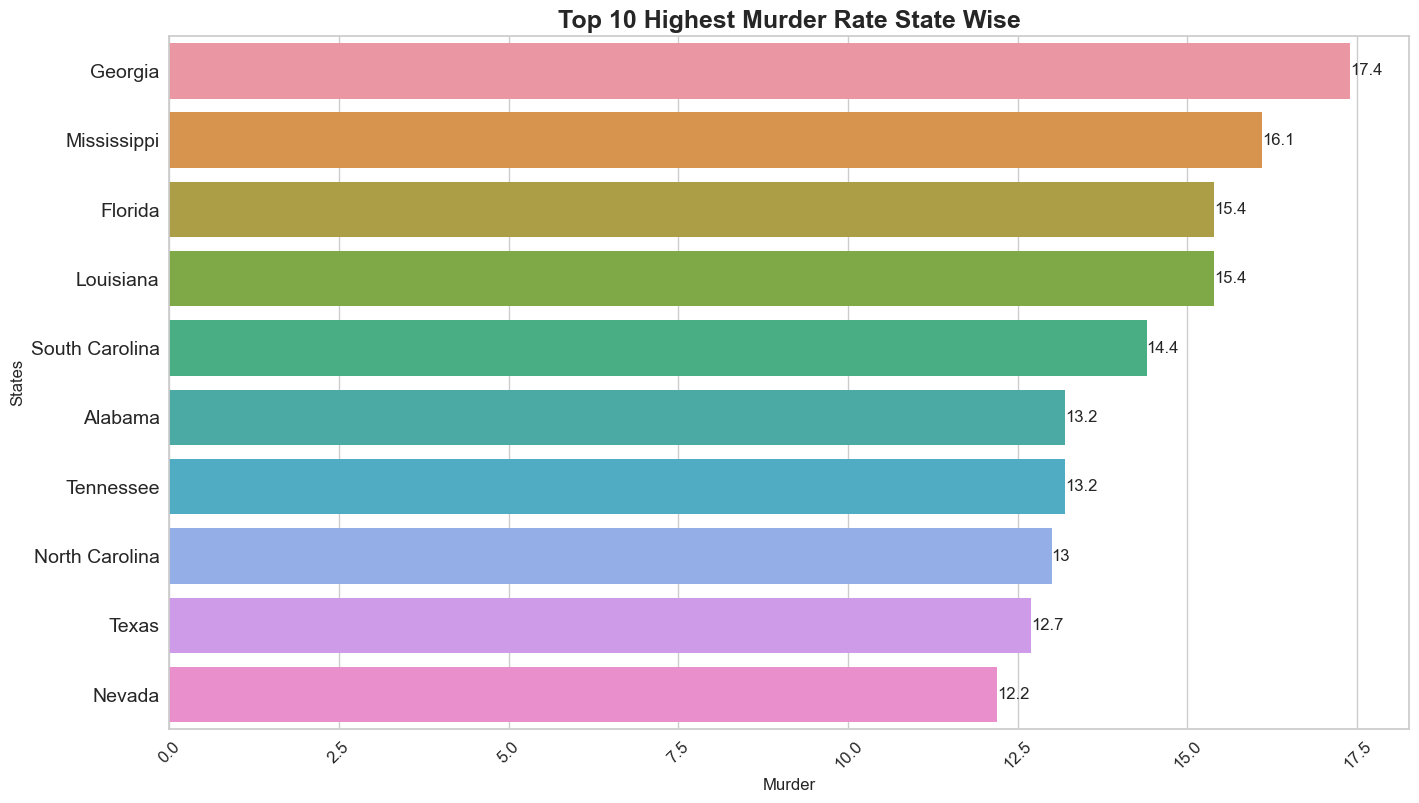

In [95]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = murder.Murder[:10], y = murder.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Highest Murder Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

In [96]:
murder = data.sort_values('Murder', ascending = True,ignore_index=True)
murder.head()

,States,Murder,Assault,UrbanPop,Rape
0,North Dakota,0.8,45,44,7.3
1,New Hampshire,2.1,57,56,9.5
2,Maine,2.1,83,51,7.8
3,Iowa,2.2,56,57,11.3
4,Vermont,2.2,48,32,11.2


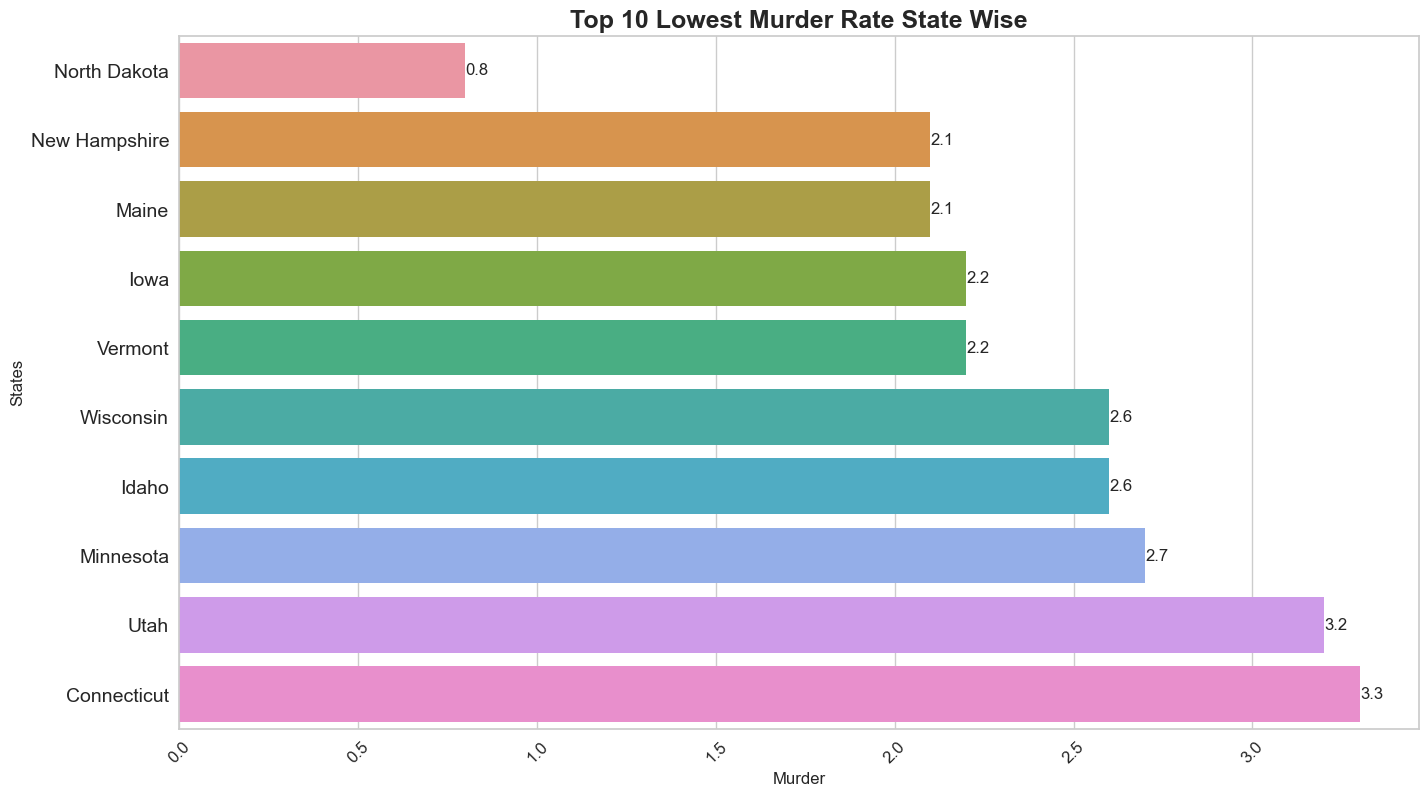

In [97]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = murder.Murder[:10], y = murder.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Lowest Murder Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

### Observations:
+ #### Highest Murder Rate : Georgia, Missisippi and Florida
+ #### Lowest Murder Rate : North Dakota, New Hampshire, Idaho, Iowa, Maine, Vermont and Wisconsin.

### 4.2 Assault Rate<a class="anchor" id="4.2"></a>

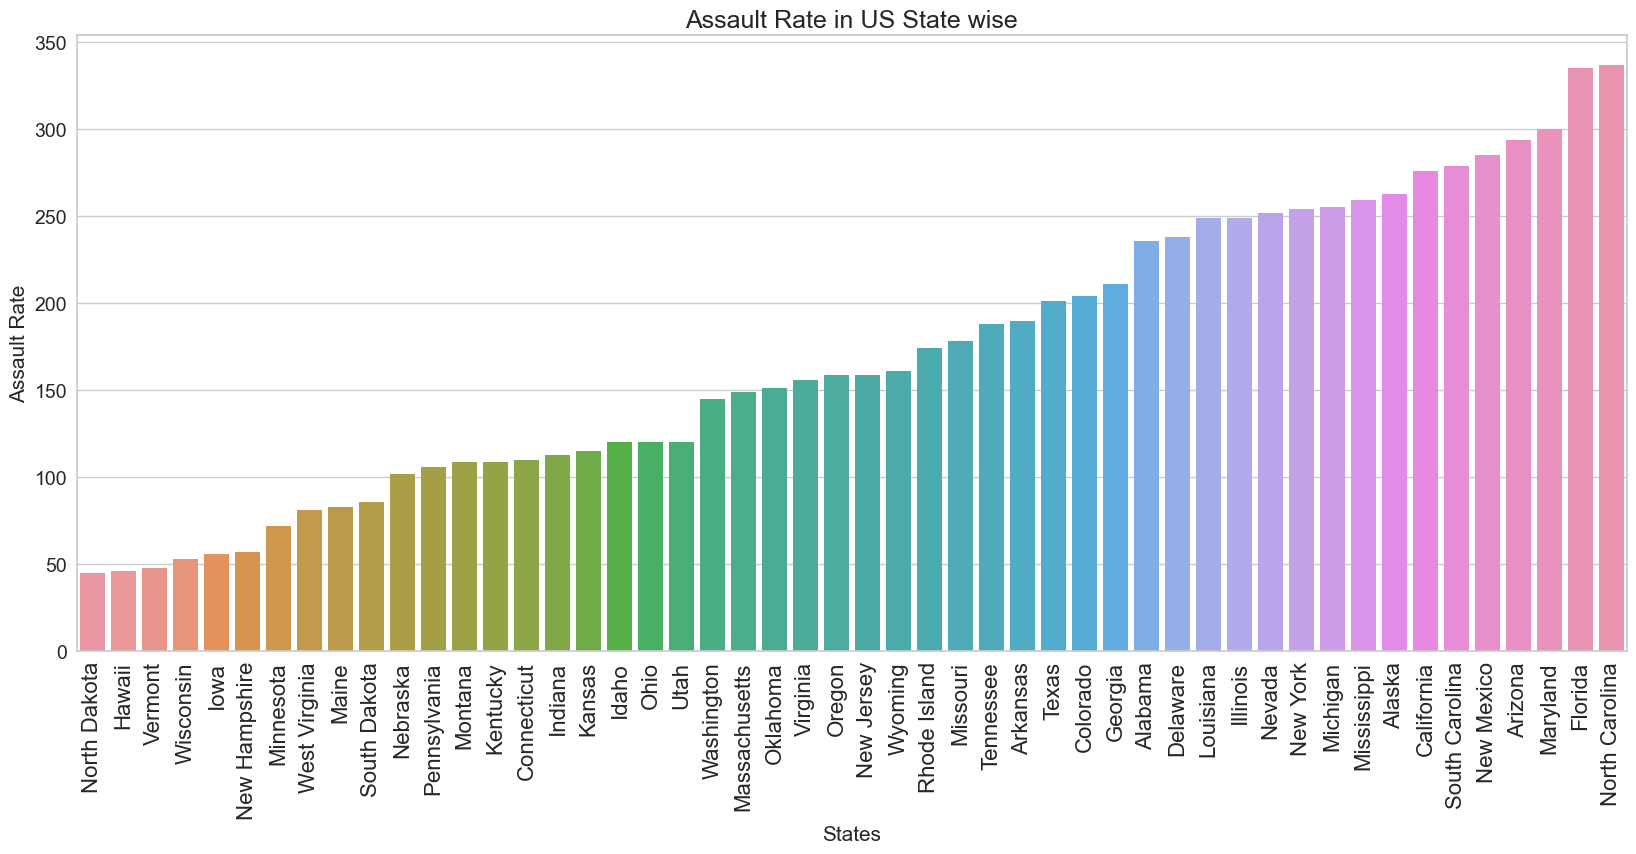

In [98]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='States',
            y="Assault", 
            data=data, 
            order=data.sort_values('Assault').States)
# set labels
plt.xlabel("States", size=15)
plt.ylabel("Assault Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Assault Rate in US State wise", size=18)
plt.show()

In [99]:
print('Top 10 States with Highest Assault Rate')
data.sort_values('Assault',ascending=False, ignore_index=True).head(10)

Top 10 States with Highest Assault Rate


,States,Murder,Assault,UrbanPop,Rape
0,North Carolina,13.0,337,45,16.1
1,Florida,15.4,335,80,31.9
2,Maryland,11.3,300,67,27.8
3,Arizona,8.1,294,80,31.0
4,New Mexico,11.4,285,70,32.1
5,South Carolina,14.4,279,48,22.5
6,California,9.0,276,91,40.6
7,Alaska,10.0,263,48,44.5
8,Mississippi,16.1,259,44,17.1
9,Michigan,12.1,255,74,35.1


In [100]:
print('Top 10 States with Lowest Assault Rate')
data.sort_values('Assault',ascending=True, ignore_index=True).head(10)

Top 10 States with Lowest Assault Rate


,States,Murder,Assault,UrbanPop,Rape
0,North Dakota,0.8,45,44,7.3
1,Hawaii,5.3,46,83,20.2
2,Vermont,2.2,48,32,11.2
3,Wisconsin,2.6,53,66,10.8
4,Iowa,2.2,56,57,11.3
5,New Hampshire,2.1,57,56,9.5
6,Minnesota,2.7,72,66,14.9
7,West Virginia,5.7,81,39,9.3
8,Maine,2.1,83,51,7.8
9,South Dakota,3.8,86,45,12.8


In [101]:
Assault = data.sort_values('Assault', ascending = False)

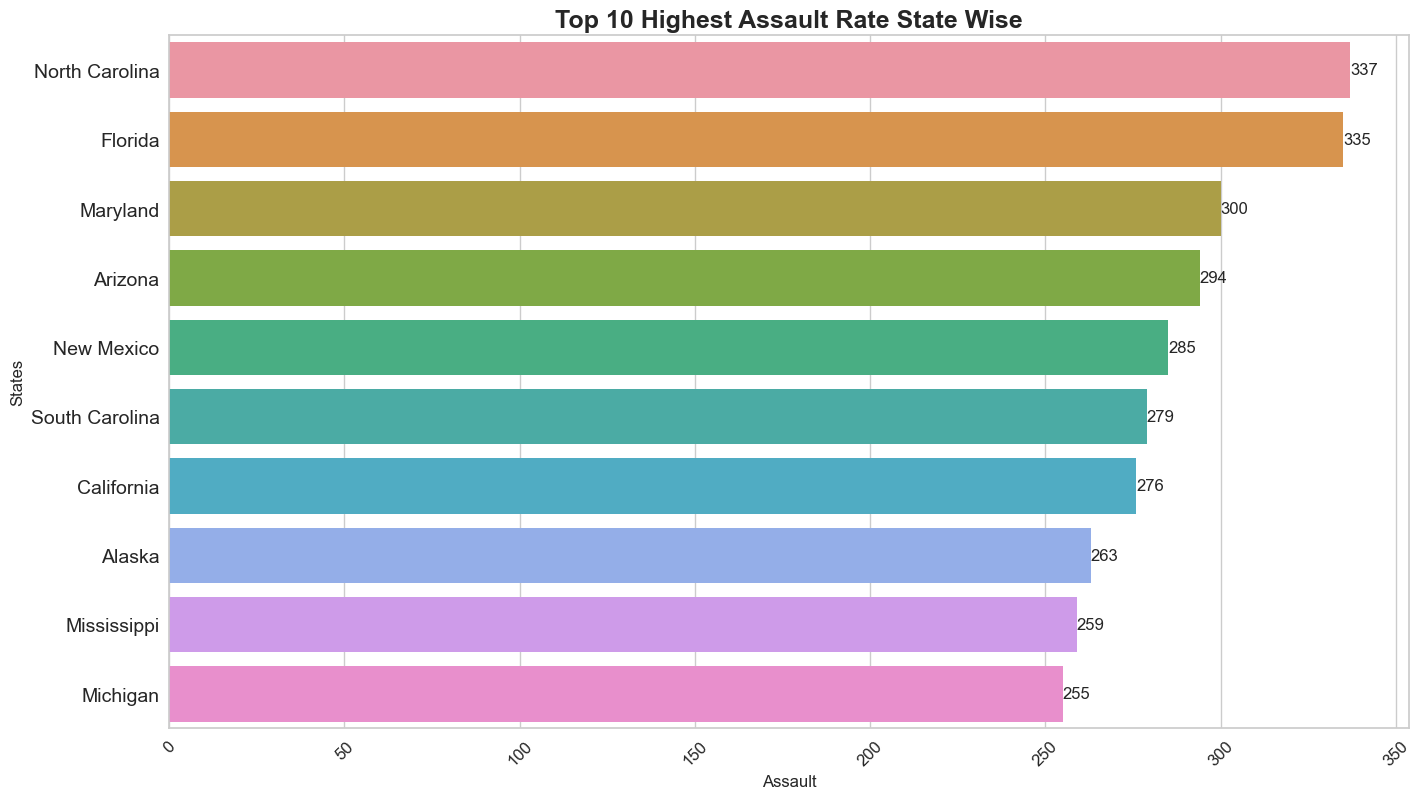

In [102]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = Assault.Assault[:10], y = Assault.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Highest Assault Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

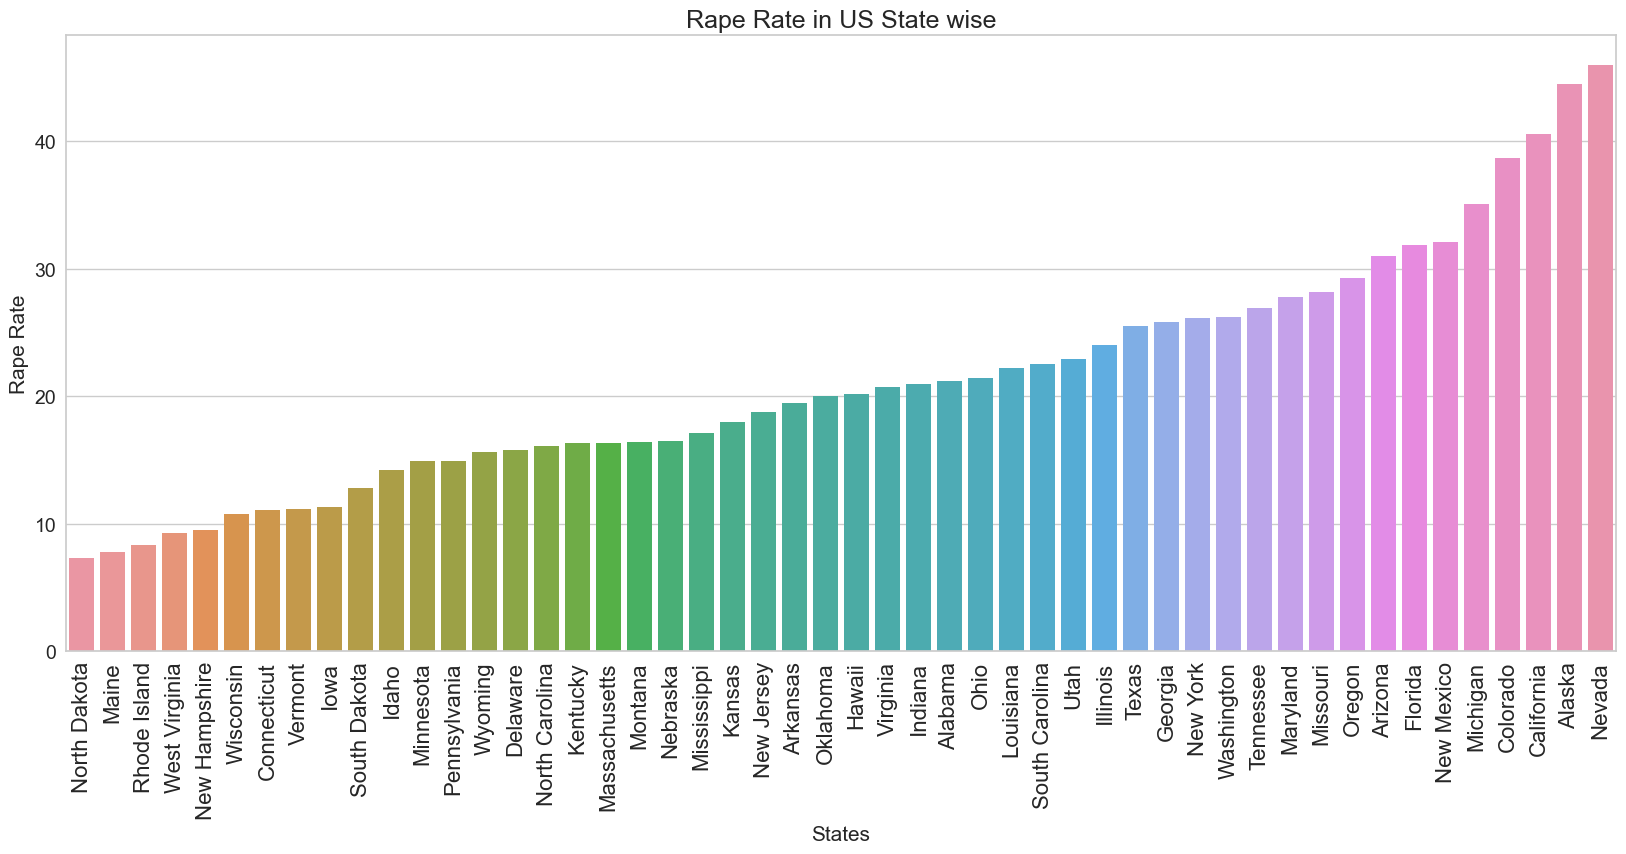

In [105]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='States',
            y="Rape", 
            data=data, 
            order=data.sort_values('Rape').States)
# set labels
plt.xlabel("States", size=15)
plt.ylabel("Rape Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Rape Rate in US State wise", size=18)
plt.show()

In [106]:
print('Top 10 States with Highest Rape Rate')
data.sort_values('Rape',ascending=False, ignore_index=True).head(10)

Top 10 States with Highest Rape Rate


,States,Murder,Assault,UrbanPop,Rape
0,Nevada,12.2,252,81,46.0
1,Alaska,10.0,263,48,44.5
2,California,9.0,276,91,40.6
3,Colorado,7.9,204,78,38.7
4,Michigan,12.1,255,74,35.1
5,New Mexico,11.4,285,70,32.1
6,Florida,15.4,335,80,31.9
7,Arizona,8.1,294,80,31.0
8,Oregon,4.9,159,67,29.3
9,Missouri,9.0,178,70,28.2


In [107]:
print('Top 10 States with Lowest Rape Rate')
data.sort_values('Rape',ascending=True, ignore_index=True).head(10)

Top 10 States with Lowest Rape Rate


,States,Murder,Assault,UrbanPop,Rape
0,North Dakota,0.8,45,44,7.3
1,Maine,2.1,83,51,7.8
2,Rhode Island,3.4,174,87,8.3
3,West Virginia,5.7,81,39,9.3
4,New Hampshire,2.1,57,56,9.5
5,Wisconsin,2.6,53,66,10.8
6,Connecticut,3.3,110,77,11.1
7,Vermont,2.2,48,32,11.2
8,Iowa,2.2,56,57,11.3
9,South Dakota,3.8,86,45,12.8


In [108]:
Rape = data.sort_values('Rape', ascending = False)

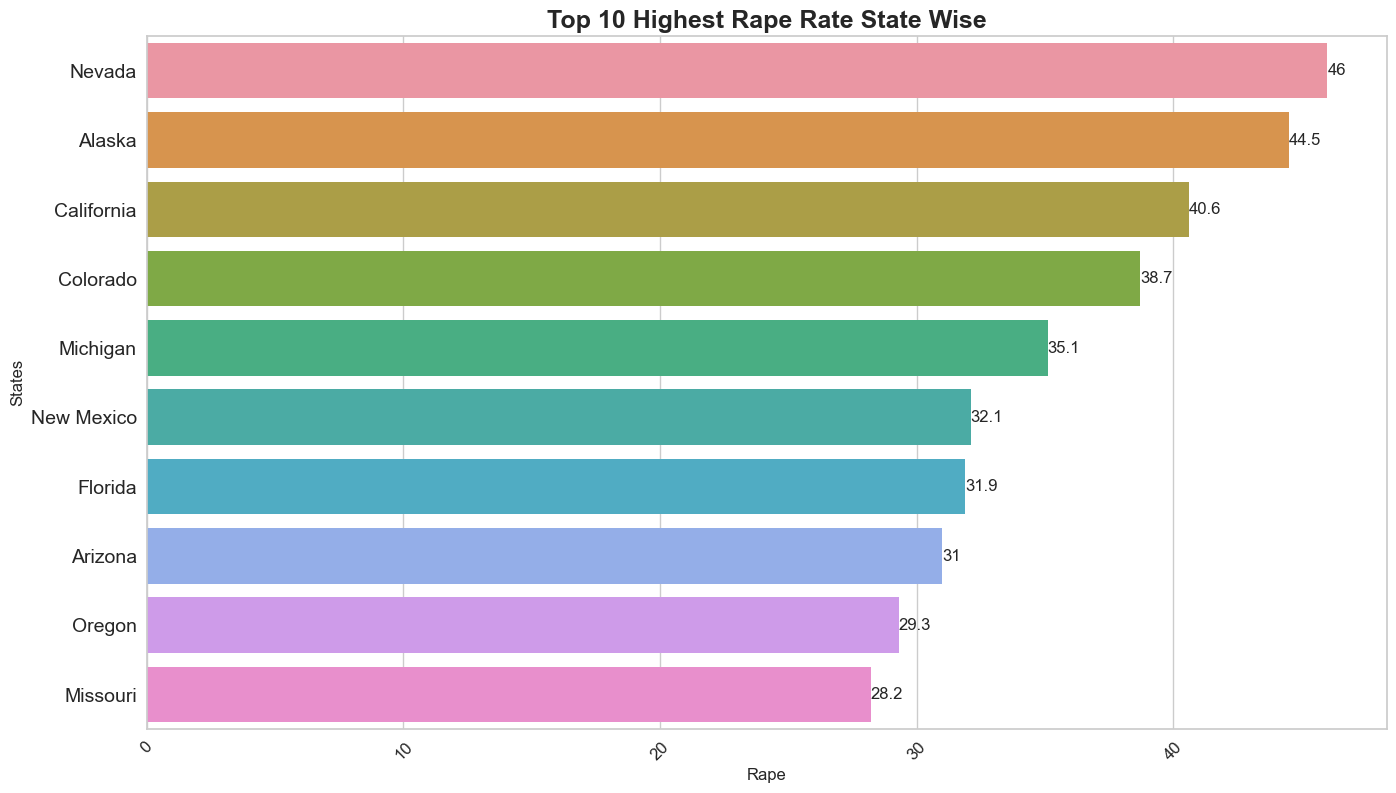

In [109]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = Rape.Rape[:10], y = Rape.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Highest Rape Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

ValueError: rotation must be 'vertical', 'horizontal' or a number, not 0

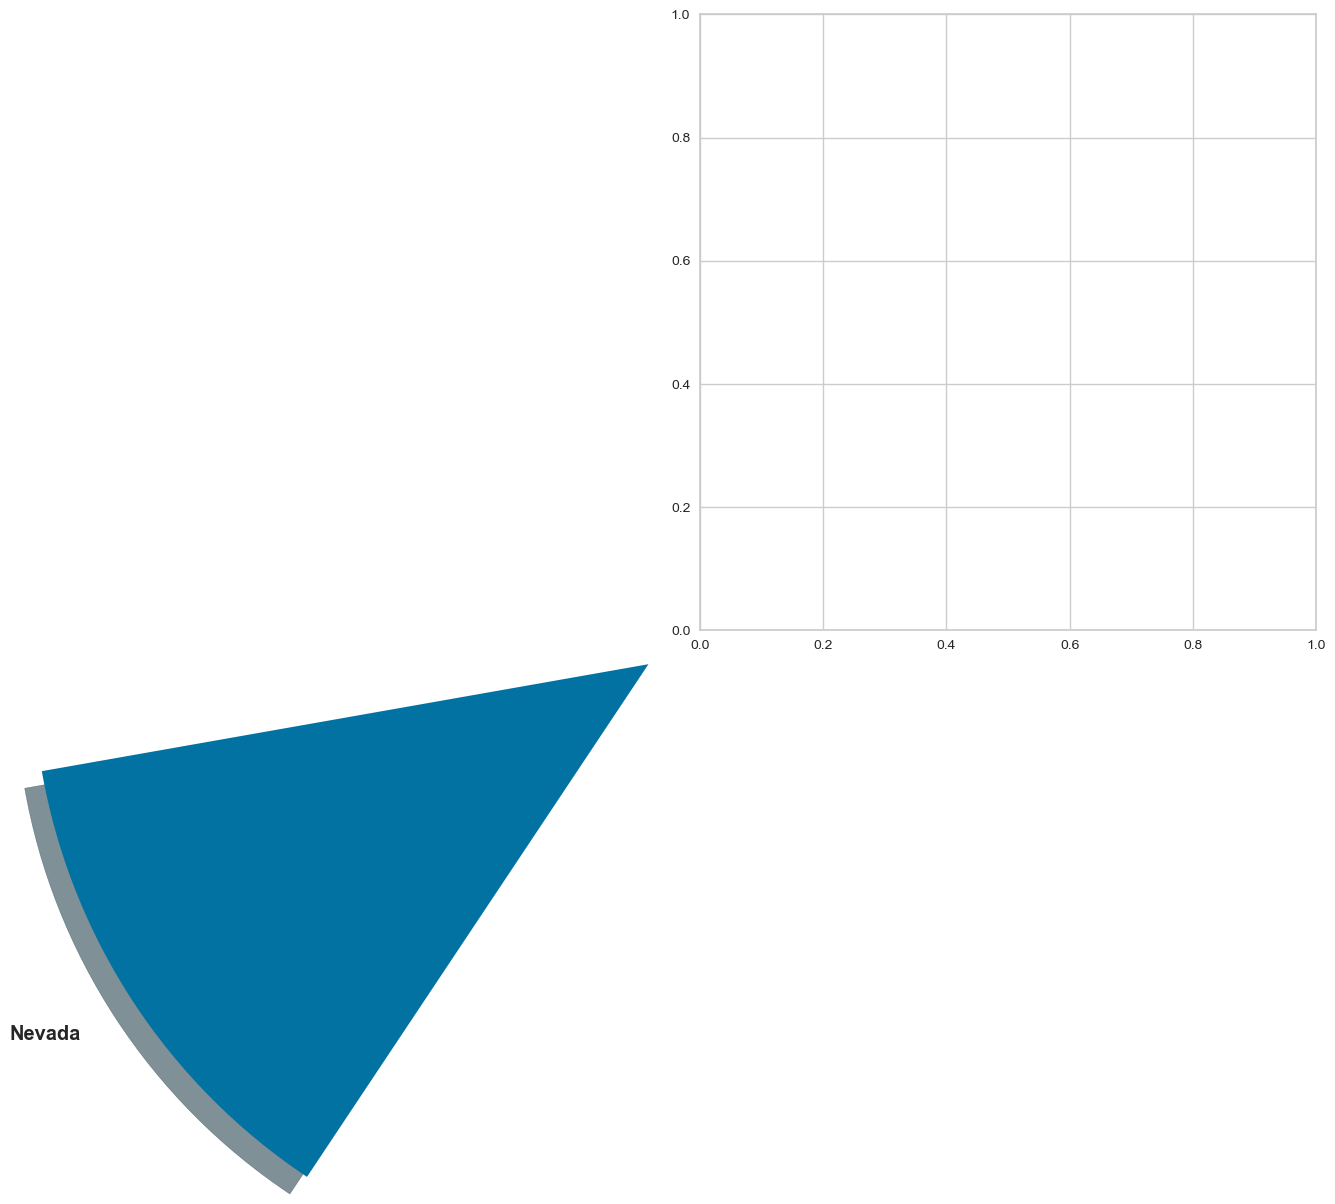

In [110]:
plt.figure(figsize = (8,8))
plt.pie(Rape.Rape[:10],
       labels=Rape.States[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Top 10 Highest Rape Rate States-wise", fontsize = 18, fontweight = 'bold')
plt.show()

In [111]:
rape = data.sort_values('Rape', ascending = True)

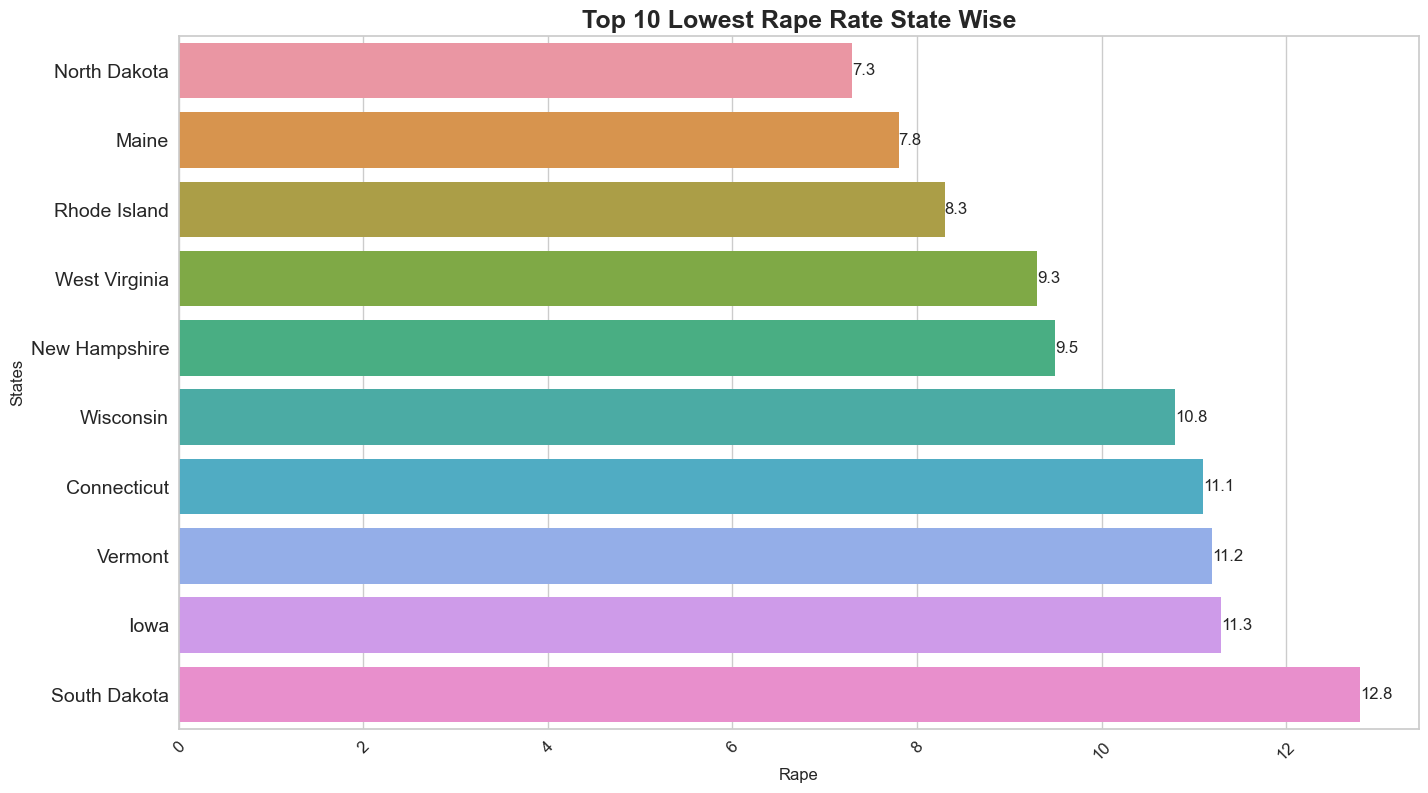

In [112]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = rape.Rape[:10], y = rape.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Lowest Rape Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

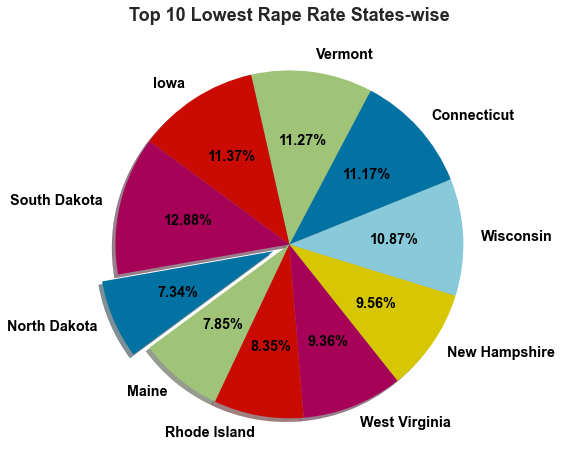

In [27]:
plt.figure(figsize = (8,8))
plt.pie(rape.Rape[:10],
       labels=rape.States[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Top 10 Lowest Rape Rate States-wise", fontsize = 18, fontweight = 'bold')
plt.show()

### Observations:
+ #### Highest Rape Rate : Nevada, Alaska and California
+ #### Lowest Rape Rate : North Dakota, Maine and Rhode Island.

### 4.4 Urban Population Rate<a class="anchor" id="4.4"></a>

In [113]:
data.columns

Index(['States', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

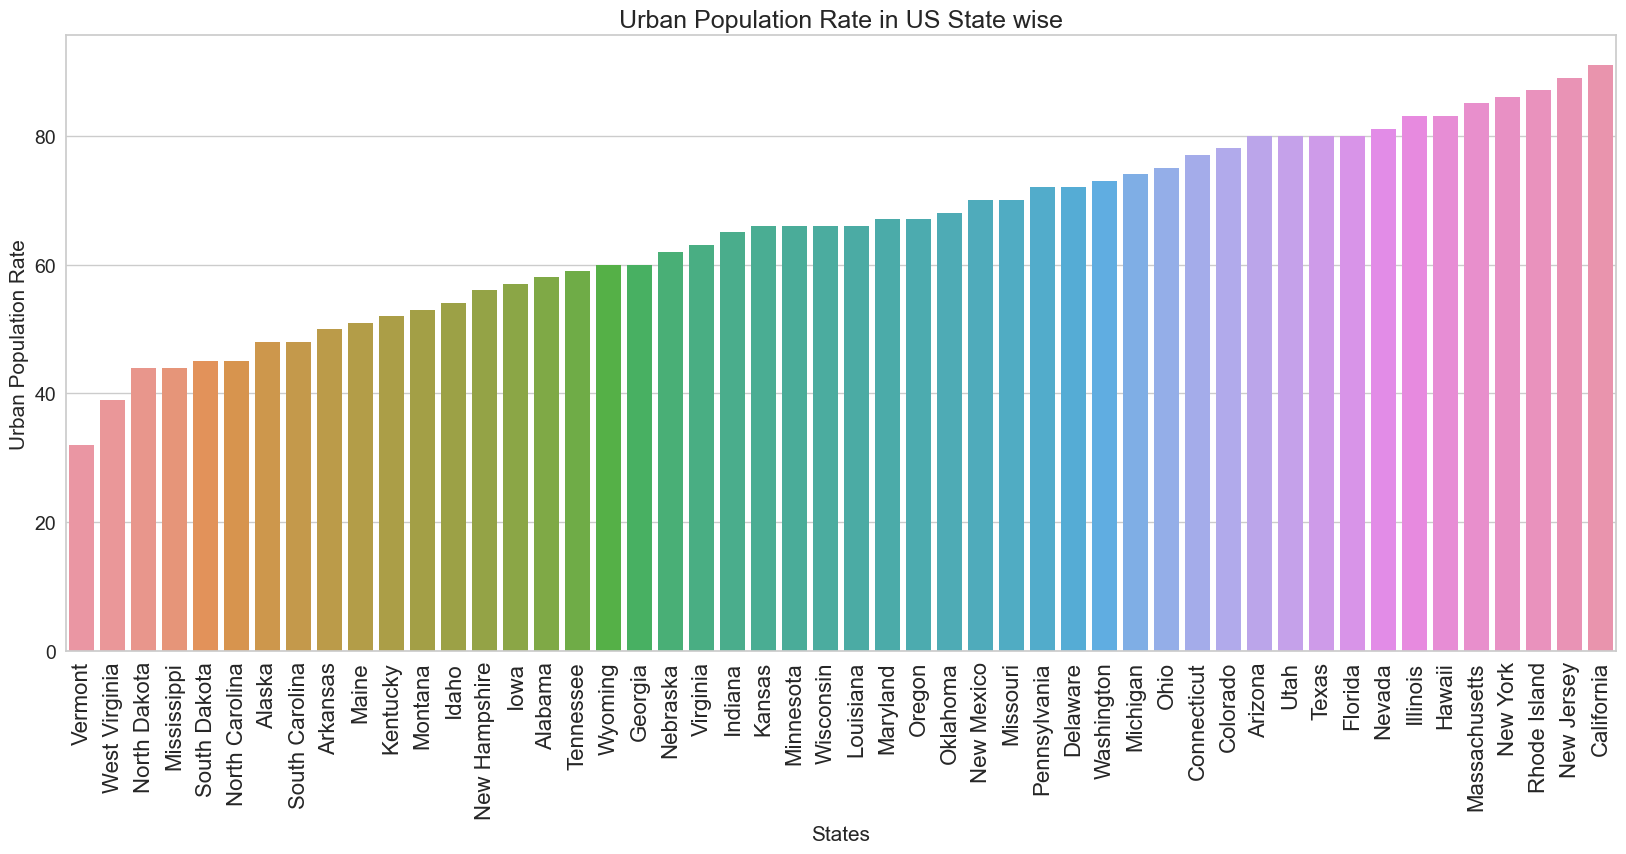

In [114]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='States',
            y="UrbanPop", 
            data=data, 
            order=data.sort_values('UrbanPop').States)
# set labels
plt.xlabel("States", size=15)
plt.ylabel("Urban Population Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Urban Population Rate in US State wise", size=18)
plt.show()

In [115]:
print('Top 10 States with Highest Urban Population Rate')
data.sort_values('UrbanPop',ascending=False, ignore_index=True).head(10)

Top 10 States with Highest Urban Population Rate


,States,Murder,Assault,UrbanPop,Rape
0,California,9.0,276,91,40.6
1,New Jersey,7.4,159,89,18.8
2,Rhode Island,3.4,174,87,8.3
3,New York,11.1,254,86,26.1
4,Massachusetts,4.4,149,85,16.3
5,Hawaii,5.3,46,83,20.2
6,Illinois,10.4,249,83,24.0
7,Nevada,12.2,252,81,46.0
8,Texas,12.7,201,80,25.5
9,Arizona,8.1,294,80,31.0


In [116]:
print('Top 10 States with Lowest Urban Population Rate')
data.sort_values('UrbanPop',ascending=True, ignore_index=True).head(10)

Top 10 States with Lowest Urban Population Rate


,States,Murder,Assault,UrbanPop,Rape
0,Vermont,2.2,48,32,11.2
1,West Virginia,5.7,81,39,9.3
2,North Dakota,0.8,45,44,7.3
3,Mississippi,16.1,259,44,17.1
4,South Dakota,3.8,86,45,12.8
5,North Carolina,13.0,337,45,16.1
6,Alaska,10.0,263,48,44.5
7,South Carolina,14.4,279,48,22.5
8,Arkansas,8.8,190,50,19.5
9,Maine,2.1,83,51,7.8


In [117]:
urbanpop = data.sort_values('UrbanPop', ascending = False)

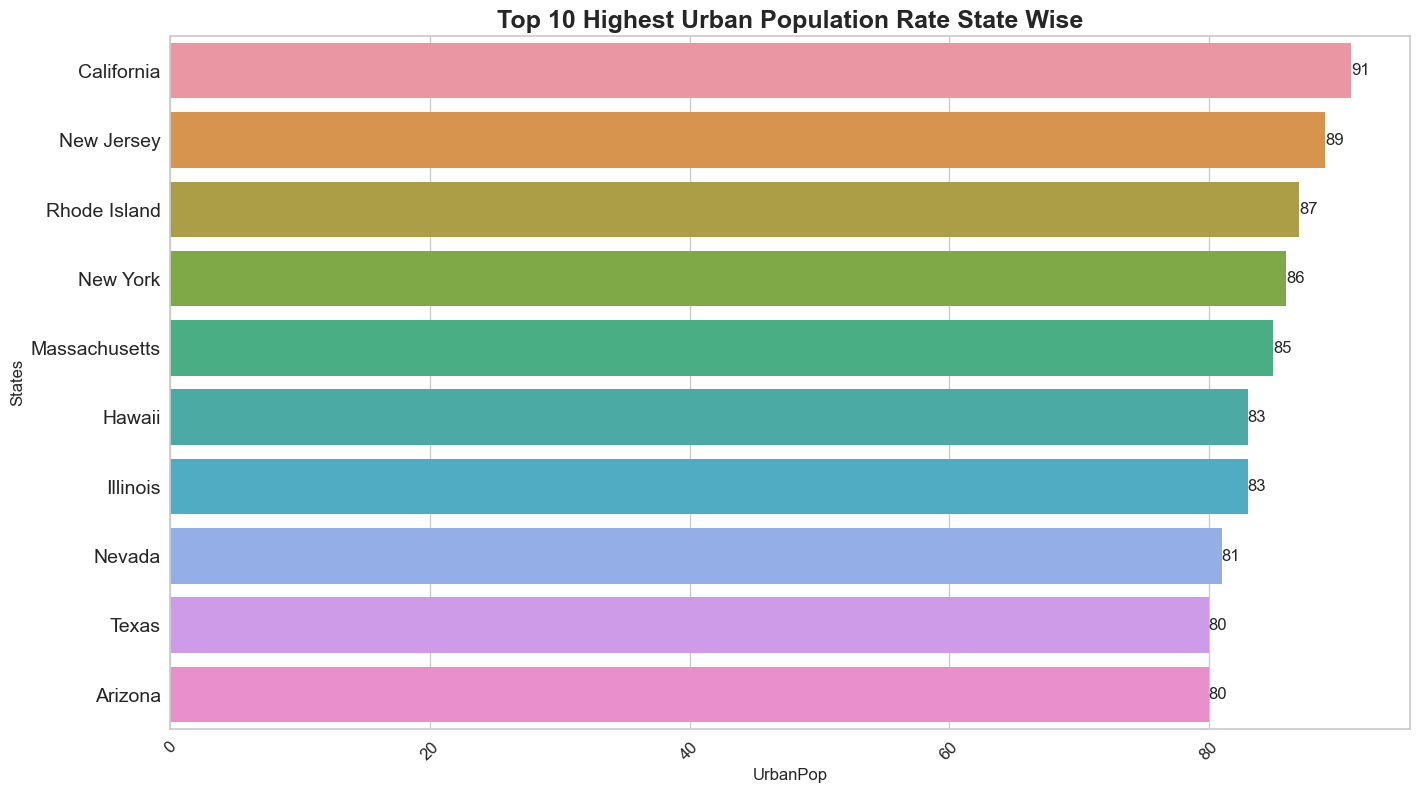

In [118]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = urbanpop.UrbanPop[:10], y = urbanpop.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Highest Urban Population Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

In [121]:
UrbanPop = data.sort_values('UrbanPop', ascending = True)

### Observations:
+ #### Highest Urban Population Rate : California, New Jersey and Rhode Island
+ #### Lowest Urban Population Rate : Vermount, West Virginia and North Dakota.

## 5. Data Preprocessing<a class="anchor" id="5"></a>

### 5.1) Standardizing the Data<a class="anchor" id="5.1"></a>

[Table of Contents](#0.1)

In [122]:
df = data.set_index('States')
df.head()

,Murder,Assault,UrbanPop,Rape
States,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [123]:
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(df)
std_df.shape

(50, 4)

### 5.2) Normalizing the data<a class="anchor" id="5.2"></a>

In [124]:
# Using Minmaxscaler for accuracy result comparison

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(df)
minmax_df.shape

(50, 4)

## 6. KMeans Clustering<a class="anchor" id="6"></a>

[Table of Contents](#0.1)

After all the analyses we now start with the K-Means Clustering procedure

K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

The main objective of the K-Means algorithm is to minimize the sum of distances between the points and their respective cluster centroid. The first step in k-means is to pick the number of clusters, k. Then keep the iterations running until one of the below satisifes:

1. Centroids of newly formed clusters do not change
2. Points remain in the same cluster
3. Maximum number of iterations are reached

In K Means clustering we need to first assign the K number of clusters which can be taken up using the thumb rule of "Sqrt(n)/2" or plotting the Elbow curve, aka Scree plot.

### 6.1 Elbow Method for Determining Cluster Amount<a class="anchor" id="6.1"></a>

### Standard Scaler Applied on Data

In [125]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(std_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

,num_clusters,cluster_errors
0,1,200.000000
1,2,104.961633
2,3,80.085695
3,4,57.554259
4,5,50.439514
5,6,43.875406
6,7,40.142171
7,8,35.875303
8,9,30.876621
9,10,28.600613


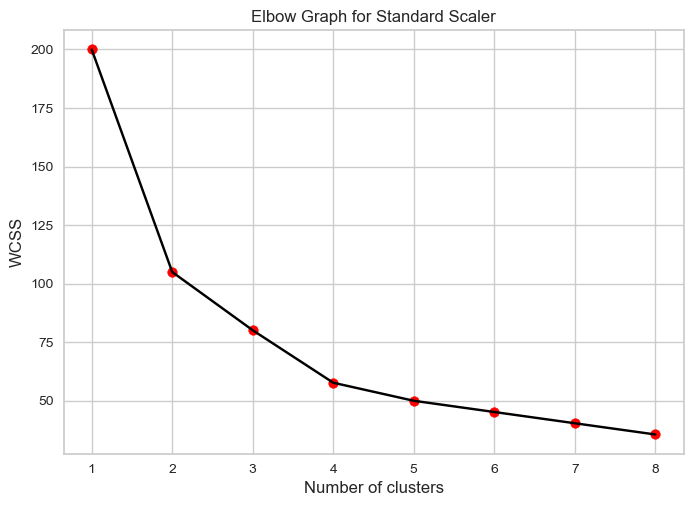

In [126]:
# within-cluster sum-of-squares criterion 
# Use Elbow Graph to find optimum number of  clusters (K value) from K values range
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS 
# random state can be anything from 0 to 42, but the same number to be used everytime,so that the results don't change. 

wcss=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

TypeError: lineplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

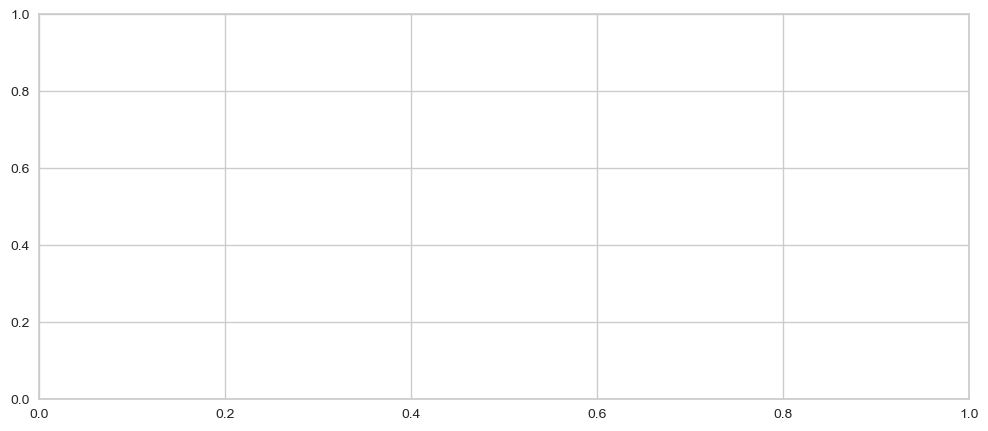

In [127]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(std_df)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(std_df, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("clusters inertia")
ax.axvline(4, ls="--", c="red")
ax.axvline(5, ls="--", c="red")
plt.grid()
plt.show()

##### There is no clear "elbow" visible. A choice of 4 or 5 clusters seems to be fair. Let's see the silhouette score.

<b>Internal measures for cluster validation

+ The goal of partitioning clustering algorithms is to split the data set into clusters of objects, such that:

the objects in the same cluster are similar as much as possible,
and the objects in different clusters are highly distinct
That is, we want the average distance within cluster to be as small as possible; and the average distance between clusters to be as large as possible.

Internal validation measures reflect often the compactness, the connectedness and the separation of the cluster partitions.

+ Compactness or cluster cohesion: Measures how close are the objects within the same cluster. A lower within-cluster variation is an indicator of a good compactness (i.e., a good clustering). The different indices for evaluating the compactness of clusters are base on distance measures such as the cluster-wise within average/median distances between observations.
+ Separation: Measures how well-separated a cluster is from other clusters. The indices used as separation measures include:
distances between cluster centers
the pairwise minimum distances between objects in different clusters
+ Connectivity: corresponds to what extent items are placed in the same cluster as their nearest neighbors in the data space. The connectivity has a value between 0 and infinity and should be minimized.
Generally most of the indices used for internal clustering validation combine compactness and separation measures as follow:

Index=(α×Separation)(β×Compactness)

Where α and β are weights.

In this section, we’ll describe the two commonly used indices for assessing the goodness of clustering: the silhouette width and the Dunn index. These internal measure can be used also to determine the optimal number of clusters in the data.



### 6.2 Silhouette Score<a class="anchor" id="6.2"></a>

<b>Silhouette coefficient

+ The silhouette analysis measures how well an observation is clustered and it estimates the average distance between clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters.

For each observation i, the silhouette width si is calculated as follows:

For each observation i, calculate the average dissimilarity ai between i and all other points of the cluster to which i belongs. \
For all other clusters C, to which i does not belong, calculate the average dissimilarity d(i,C) of i to all observations of C. The smallest of these d(i,C) is defined as bi=minCd(i,C). The value of bi can be seen as the dissimilarity between i and its “neighbor” cluster, i.e., the nearest one to which it does not belong.
    

+ Finally the silhouette width of the observation i is defined by the formula: Si=(bi−ai)/max(ai,bi).\
Silhouette width can be interpreted as follow:

Observations with a large Si (almost 1) are very well clustered.\
A small Si (around 0) means that the observation lies between two clusters.\
Observations with a negative Si are probably placed in the wrong cluster.

In [ ]:
# 1. How many number of clusters? n_clusters?

# Since true labels are not known..we will use Silhouette Coefficient (Clustering performance evaluation)
# knee Elbow graph method


# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model = KMeans(random_state=10, max_iter=500, init='k-means++')

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
# Fit the data and visualize
print('Elbow Plot for Standard Scaler data')
visualizer.fit(std_df)    
visualizer.poof()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

In [ ]:
# With the elbow method, the ideal number of clusters to use was 6.
# We will also use the Silhouette score to determine an optimal number.

clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for stadardScaler applied on data.

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(std_df)
    sil_score1= sil(std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

In [ ]:
range_n_clusters = [2,3,4,5,6,7,8,9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(std_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(std_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = sil(std_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(std_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(std_df[:,0], std_df[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:,0], centers[:,1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data after Standard scaler.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

####  Conclusion:
According the the silhouette score of:

The standardized data, although the ideal number of clusters is 2, with a score higher than other options, of 0.40. we will go for 3 number of clusters

## 6.3 Build KMeans Cluster algorithm using K=3 and Standard Scaler Applied Dataset <a class="anchor" id="6.3"></a>

[Table of Contents](#0.1)

In [ ]:
# we have found good number of cluster = 3
# model building using cluster numbers = 3

model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(std_df)
y_predict_kmeans.shape

In [ ]:
# these are nothing but cluster labels...

y_predict_kmeans

In [ ]:
model_kmeans.labels_

In [ ]:
# cluster centres associated with each lables

model_kmeans.cluster_centers_

In [ ]:
# within-cluster sum of squared

# The lower values of inertia are better and zero is optimal.
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

model_kmeans.inertia_

In [ ]:
#Assign clusters to the data set
df['Kmeans_label'] = model_kmeans.labels_

In [ ]:
# Group data by Clusters (K=6)
df.groupby('Kmeans_label').agg(['mean'])

In [ ]:
df[df['Kmeans_label']==0]

In [ ]:
df[df['Kmeans_label']==1]

In [ ]:
df[df['Kmeans_label']==2]

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(15,6)



sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a'])
sil_visualizer1.fit(std_df)


# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 3) # 6 is number of clusters
ax2.scatter(std_df[:, 0], std_df[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 0], centers1[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')


ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 3),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

In [ ]:
# Let's visualize the data we reduced to 2 sets.

plt.scatter(std_df[:,0], std_df[:,1], c = model_kmeans.labels_, s = 50, cmap = "viridis")

centers = model_kmeans.cluster_centers_                                 
# We want to create 2 centers and show them on the visual.

plt.scatter(centers[:,0], centers[:,1], c = "black", s = 200, alpha = 0.5)

### Observations:
+ #### The Cities in the Cluster-0 seems to be Safe-Zone where there are relativley less Murders,Assaults and Rapes.
+ #### The Cities in Cluster-1 seems to have higher crime rates and can be regarded as Danger-Zone.
+ #### The Cities in Cluster-2 seems to have Moderate crime rates and can be regarded as Moderate-Zone

### 6.4 Elbow Method and Silhouette Score on MinMaxScaler Applied Data<a class="anchor" id="6.4"></a>

[Table of Contents](#0.1)

In [ ]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(minmax_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

In [ ]:
wcss=[]
for i in range (1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(minmax_df)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for MinMaxScaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model = KMeans(random_state=10, max_iter=500, init='k-means++')

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
# Fit the data and visualize
print('Elbow Plot for MinMaxScaler data')
visualizer.fit(minmax_df)    
visualizer.poof()
plt.show()

In [ ]:
# With the elbow method, the ideal number of clusters to use was 6.
# We will also use the Silhouette score to determine an optimal number.

clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for MinMaxScaler Applied on data .

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(minmax_df)
    sil_score1= sil(minmax_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

In [ ]:
range_n_clusters = [2,3,4,5,6,7,8,9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(minmax_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(minmax_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = sil(minmax_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(minmax_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(minmax_df[:,0], minmax_df[:,1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:,0], centers[:,1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data after Standard scaler.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

####  Conclusion:
According the the silhouette score of:

+ The MinMax Scaler Applied data, the ideal number of clusters is 2, with a score higher than other options, of 0.42, but if you notice the number of cluster 4 has also the best variation within cluster and between cluster with zero to no values going towards -1 and no mismatch in cluster segregation than the consecutive rest

+ If we check silhouette score with Normalize data kmeans model 0.42>0.40 .Best score always close to +1.

## 6.5 Build KMeans Cluster algorithm using K=2 and MinMaxScaler Applied Dataset<a class="anchor" id="6.5"></a>

[Table of Contents](#0.1)

In [ ]:
# we have found good number of cluster = 2
# model building using cluster numbers = 2

model_kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(minmax_df)
y_predict_kmeans.shape

In [ ]:
# these are nothing but cluster labels...

y_predict_kmeans

In [ ]:
model_kmeans.labels_

In [ ]:
# cluster centres associated with each lables

model_kmeans.cluster_centers_

In [ ]:
# within-cluster sum of squared

# The lower values of inertia are better and zero is optimal.
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

model_kmeans.inertia_

In [ ]:
#Assign clusters to the data set
df['Kmeans_label'] = model_kmeans.labels_

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(15,6)



sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a'])
sil_visualizer1.fit(minmax_df)


# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 4) # 6 is number of clusters
ax2.scatter(minmax_df[:, 0], minmax_df[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 0], centers1[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')


ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 2),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

In [ ]:
# Let's visualize the data we reduced to 2 sets.

plt.scatter(minmax_df[:,0], minmax_df[:,1], c = model_kmeans.labels_, s = 50, cmap = "viridis")

centers = model_kmeans.cluster_centers_                                 
# We want to create 2 centers and show them on the visual.

plt.scatter(centers[:,0], centers[:,1], c = "black", s = 200, alpha = 0.5)

In [ ]:
# Group data by Clusters (K=6)
df.groupby('Kmeans_label').agg(['mean'])

#### We can now clearly see the 2 number of clusters formed, which can be described as under

+ Cluster0, Safe Zone Defines the group of Urban States with Lowest of Crimes
+ Cluster1, Danger Zone Defines the group of Urban States with Highest Rate of Crimes

## 7 Hierarchical Clustering Algorithm<a class="anchor" id="7"></a>

[Table of Contents](#0.1)

### What is Hierarchical Clustering?
+ Hierarchical clustering is a type of unsupervised machine learning algorithm used to cluster unlabeled data points. Like K-means clustering, hierarchical clustering also groups together the data points with similar characteristics.One of the major considerations in using the K-means algorithm is deciding the value of K beforehand. The hierarchical clustering algorithm does not have this restriction.The output of the hierarchical clustering algorithm is quite different from the K-mean algorithm as well. It results in an inverted tree-shaped structure, called the dendrogram.

#### Types Of Hierarchical Clustering:
##### There are two types of hierarchical clustering:

+ <b>Agglomerative</b>: The data points are clustered using a bottom-up approach starting with individual data points.
+ <b>Divisive</b>: The top-down approach is followed where all the data points are treated as one big cluster and the clustering process involves dividing the one big cluster into several small clusters.

#### The key operation in hierarchical agglomerative clustering is to repeatedly combine the two nearest clusters into a larger cluster. There are three key questions that need to be answered first:

How many numbers of cluster. Also deciding which transformation data we will use to build model.

Qiuck Notes:

linkage{“ward”, “complete”, “average”, “single”}, default=”ward” Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.

ward minimizes the variance of the clusters being merged.

average uses the average of the distances of each observation of the two sets.

complete or maximum linkage uses the maximum distances between all observations of the two sets.

single uses the minimum of the distances between all observations of the two sets.

#### 7.1 Dendogram on MinMaxScaler Applied on Dataset<a class="anchor" id="7.1"></a>

In [ ]:
# Applying Dendrogram on data. Or you may apply it on Standardized/normalized indepedent variable data.
# Here diffrent linkage method from hyperparameter is used to see diff between methods for understanding. 
# Ward method is commanly used since it is simpler to visualize understanding.
# Find number of cluster's using color coding of dendrogram. Each color indicates one cluster.

for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(minmax_df, method = methods,optimal_ordering=False))

In [ ]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(minmax_df)
        silhouette_score1 = sil(minmax_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

#### The seperation in Each Method indicate that 2 as the optimal number for clusters.

### 7.2 Dendrogram on Standard Scaler Applied on Data<a class="anchor" id="7.2"></a>

In [128]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(std_df)
        silhouette_score1 = sil(std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.4047944502519567
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4047944502519567
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4084890326217641
For n_clusters = 2 The average silhouette_score with linkage- single : 0.234555987531598

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.3103635817402789
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.36924314190439733
For n_clusters = 3 The average silhouette_score with linkage- average : 0.34863679190476177
For n_clusters = 3 The average silhouette_score with linkage- single : 0.1458234362517027

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3370187183556962
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.31595507426164543
For n_clusters = 4 The average silhouette_score with linkage- average : 0.3636819420151221
For

<b>Conclusion</b>: Max score is with cluster numbers 2 in both standard scaler transformation and Min Max scaler transformation. 

+ Heirarchical clustering means creating a tree of clusters by iteratively grouping or separating data points. There are two types of hierarchical clustering: Agglomerative clustering Divisive clustering We now apply the Agglomerative clustering technique:Agglomerative clustering is kind of a bottom-up approach. Each data point is assumed to be a separate cluster at first. Then the similar clusters are iteratively combined

### 7.3 Run Hierarchical Clustering.(Agglomerative Clustering) <a class="anchor" id="7.3"></a>

In [129]:
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_pred_hie = agg_clustering.fit_predict(minmax_df)
print(y_pred_hie.shape)
y_pred_hie

(50,)


array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

<b>Ward</b> method is actually a method that tries to minimize the variance within each cluster. In K-means when we were trying to minimize the wcss to plot our elbow method chart, here it’s almost the same the only difference is that instead of minimizing wcss we are minimizing the within-cluster variants. That is the variance within each cluster.

In [130]:
# Cluster numbers

agg_clustering.n_clusters_

2

In [131]:
# Clustering Score

(sil(minmax_df, agg_clustering.labels_)*100).round(3)

42.364

### Putting Cluster lables into original dataset And analysis of the same

In [132]:
# Concating Labels with main dataset copy

df['Hierarchical_labels'] = agg_clustering.labels_

In [133]:
df.groupby('Hierarchical_labels').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
Hierarchical_labels,,,,
0,4.870,114.433333,63.633333,15.943333
1,12.165,255.250000,68.400000,29.165000


<Axes: xlabel='Hierarchical_labels', ylabel='Murder'>

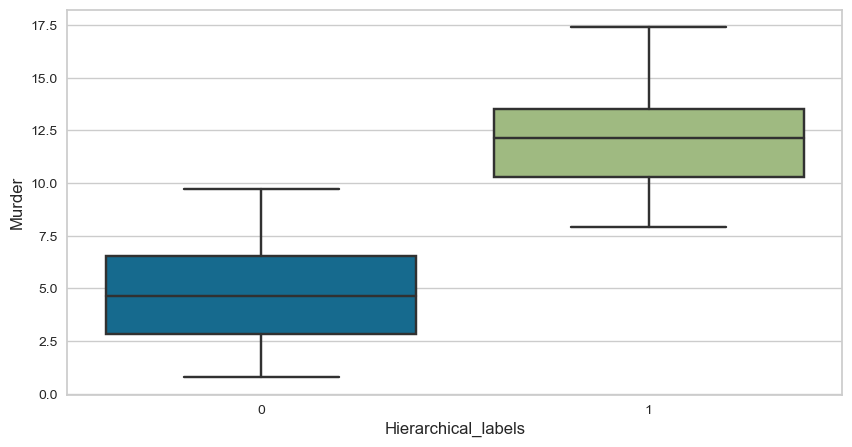

In [134]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Hierarchical_labels', y='Murder', data=df)

<Axes: xlabel='Hierarchical_labels', ylabel='Assault'>

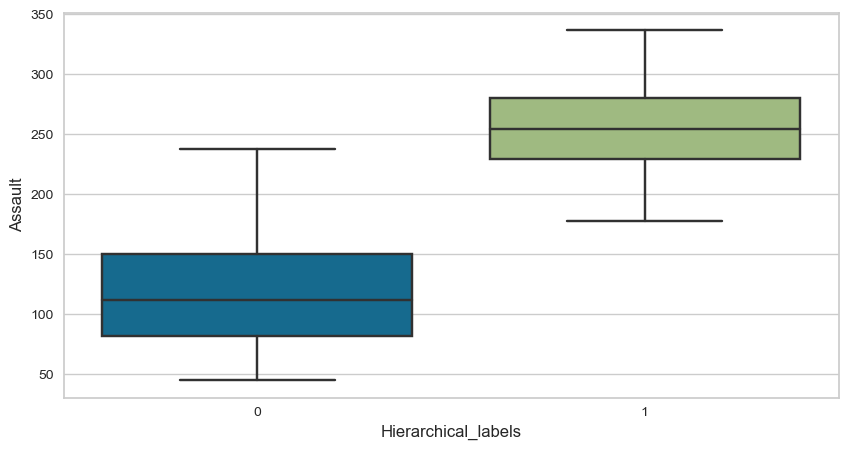

In [135]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Hierarchical_labels', y='Assault', data=df)

<Axes: xlabel='Hierarchical_labels', ylabel='Rape'>

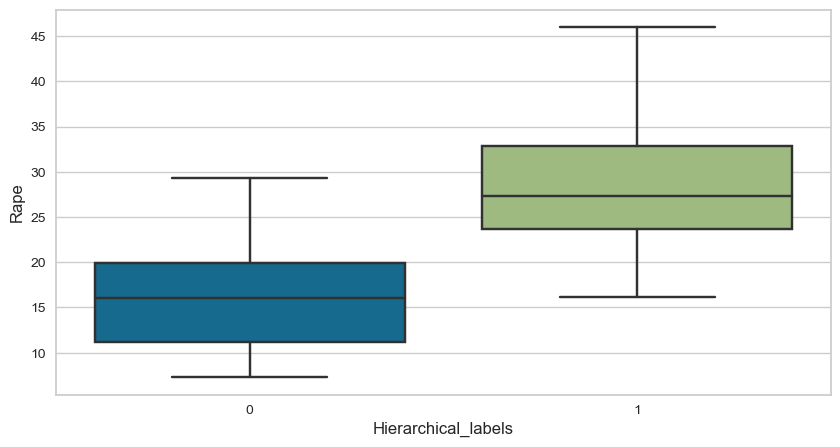

In [136]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Hierarchical_labels', y='Rape', data=df)

### Observations:
+ #### The Cities in the Cluster-0 seems to be Safe-Zone where there are relativley less Murders,Assaults and Rapes.
+ #### The Cities in Cluster-1 seems to have higher crime rates and can be regarded as Danger-Zone.

[Table of Contents](#0.1)

## 8. DBSCAN - (Density Based Spatial Clustering of Applications with Noise)<a class="anchor" id="8"></a>

Why do we need a Density-Based clustering algorithm like DBSCAN when we already have K-means clustering?

K-Means clustering may cluster loosely related observations together. Every observation becomes a part of some cluster eventually, even if the observations are scattered far away in the vector space. Since clusters depend on the mean value of cluster elements, each data point plays a role in forming the clusters. A slight change in data points might affect the clustering outcome. This problem is greatly reduced in DBSCAN due to the way clusters are formed. This is usually not a big problem unless we come across some odd shape data.

Another challenge with k-means is that you need to specify the number of clusters (“k”) in order to use it. Much of the time, we won’t know what a reasonable k value is a priori.

What’s nice about DBSCAN is that you don’t have to specify the number of clusters to use it. All you need is a function to calculate the distance between values and some guidance for what amount of distance is considered “close”. DBSCAN also produces more reasonable results than k-means across a variety of different distributions. Below figure illustrates the fact:

![FilterMethod](https://miro.medium.com/max/1339/0*xu3GYMsWu9QiKNOo.png)

### Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is a base algorithm for density-based clustering. It can discover clusters of different shapes and sizes from a large amount of data, which is containing noise and outliers.

<b>The DBSCAN algorithm uses two parameters</b>:

+ minPts: The minimum number of points (a threshold) clustered together for a region to be considered dense.

+ eps (ε): A distance measure that will be used to locate the points in the neighborhood of any point.

<b>These parameters can be understood if we explore two concepts called Density Reachability and Density Connectivity.</b>

+ Reachability in terms of density establishes a point to be reachable from another if it lies within a particular distance (eps) from it.

+ Connectivity, on the other hand, involves a transitivity based chaining-approach to determine whether points are located in a particular cluster. For example, p and q points could be connected if p->r->s->t->q, where a->b means b is in the neighborhood of a.

<b>There are three types of points after the DBSCAN clustering is complete:

![FilterMethod](https://miro.medium.com/max/627/1*yT96veo7Zb5QeswV7Vr7YQ.png)

##### Core — This is a point that has at least m points within distance n from itself.
##### Border — This is a point that has at least one Core point at a distance n.
##### Noise — This is a point that is neither a Core nor a Border. And it has less than m points within distance n from itself.

### 8.1 DBSCAN of Standard Scaled Data<a class="anchor" id="8.1"></a>

##### To choose the best combination of the algorithm parameters I will first create a matrix of investigated combinations.

In [137]:
from itertools import product

eps_values = np.arange(0.25,2,0.25) # eps values to be investigated
min_samples = np.arange(1,3)# min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [138]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(std_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(sil(std_df, DBS_clustering.labels_))

##### Collecting number of generated clusters.

A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.


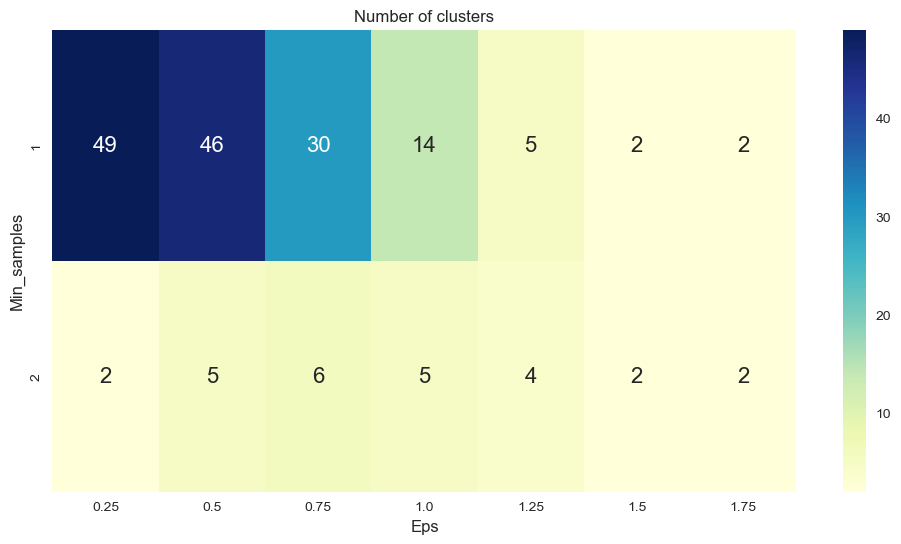

In [139]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

##### As the heatplot above shows, the number of clusters vary from 49 to 2.

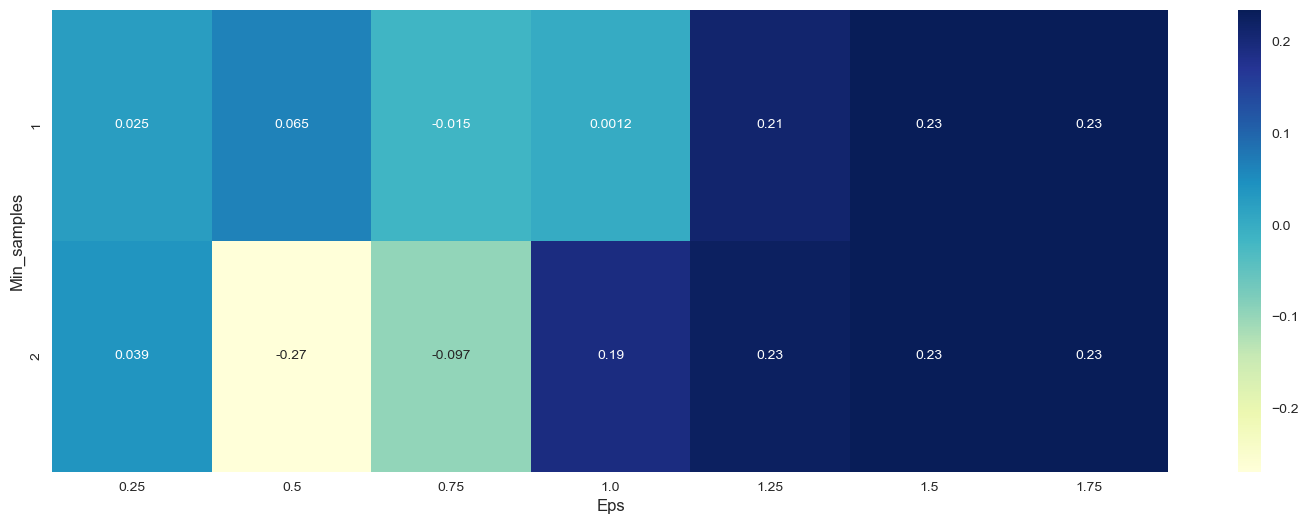

In [140]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

##### Global maximum is 0.23 for eps=1.25 and min_samples=2

In [141]:
epsilon = [0.25,0.50,0.75,1,1.25,1.50,1.75,2]
min_samples = [1,2]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(std_df)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(std_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 1.5 
min_sample= 1 
number of clusters= 2 
average silhouette score= 0.2346


##### Run DBSCAN on Standard Scaled data with optimal min_sample and epsilon values

In [142]:
dbscan = DBSCAN(eps=1.5, min_samples=1) # min_samples = number of columns  or len(dataset.columns)* 3
dbscan.fit(std_df)

DBSCAN(eps=1.5, min_samples=1)

In [143]:
dbscan.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [144]:
# -1 are the noise points in our dataset and the rest are the clusters

In [145]:
# Concating Labels with main dataset copy

df['DBSCAN_labels'] = dbscan.labels_
df.head()

,Murder,Assault,UrbanPop,Rape,Hierarchical_labels,DBSCAN_labels
States,,,,,,
Alabama,13.2,236,58,21.2,1,0
Alaska,10.0,263,48,44.5,1,1
Arizona,8.1,294,80,31.0,1,0
Arkansas,8.8,190,50,19.5,0,0
California,9.0,276,91,40.6,1,0


In [146]:
df.groupby('DBSCAN_labels').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,Hierarchical_labels
,mean,mean,mean,mean,mean
DBSCAN_labels,,,,,
0,7.742857,168.877551,65.897959,20.757143,0.387755
1,10.000000,263.000000,48.000000,44.500000,1.000000


### Silhouette Score for DBSCAN

In [147]:
print("Silhouette Coefficient: %0.3f" % sil(std_df, dbscan.labels_))

Silhouette Coefficient: 0.235


### 8.2 DBSCAN on MinMax Scaled Data<a class="anchor" id="8.2"></a>

##### To choose the best combination of the algorithm parameters I will first create a matrix of investigated combinations.

In [148]:
from itertools import product

eps_values = np.arange(0.25,0.75,0.25) # eps values to be investigated
min_samples = np.arange(1,3)# min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [149]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(minmax_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(sil(minmax_df, DBS_clustering.labels_))

##### Collecting number of generated clusters.

A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.


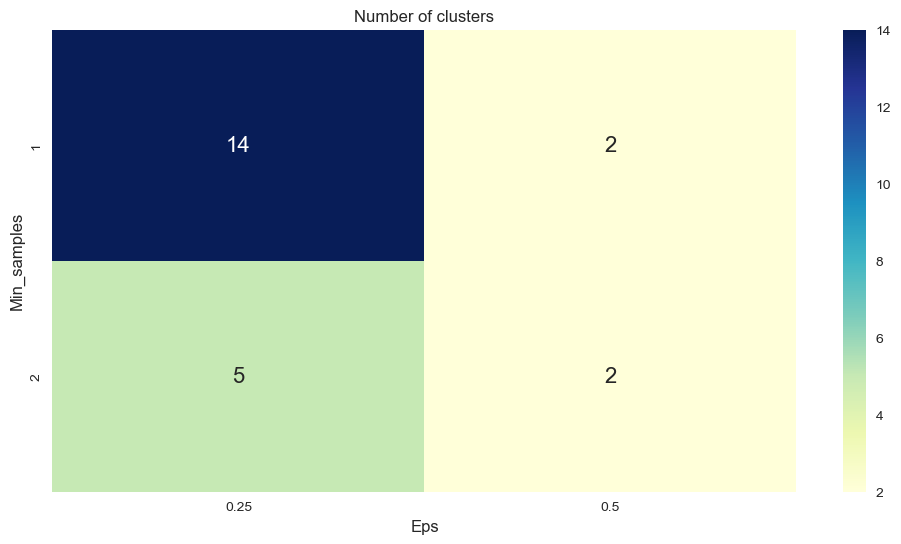

In [150]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

##### As the heatplot above shows, the number of clusters vary from 14 to 2.

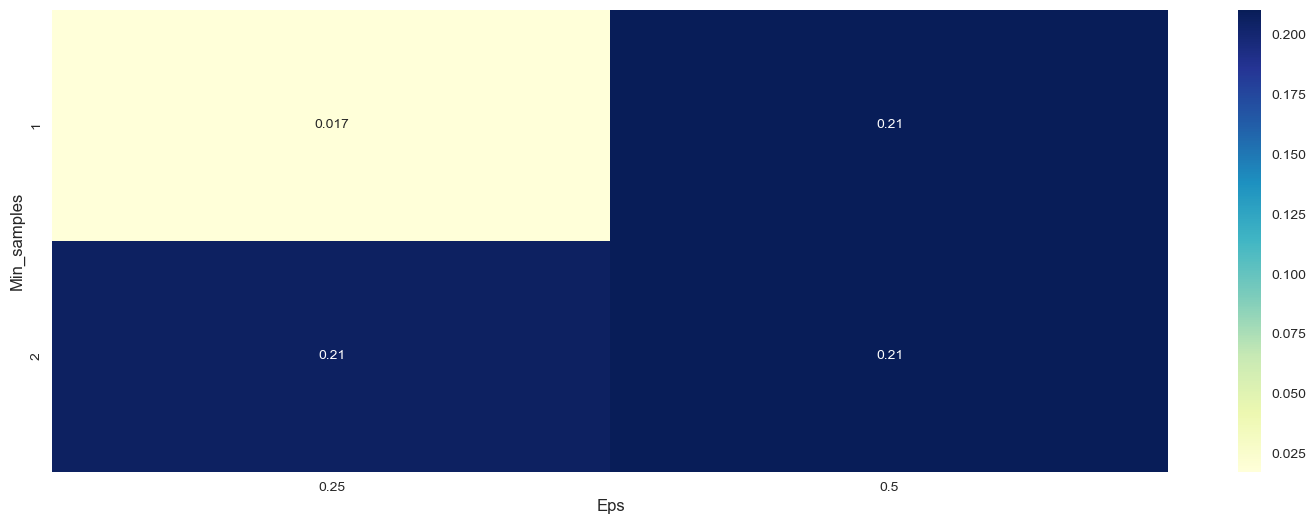

In [151]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

##### Global maximum is 0.21 for eps=0.5 and min_samples=2

In [152]:
epsilon = [0.25,0.5]
min_samples = [1,2]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(minmax_df)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(minmax_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 0.5 
min_sample= 1 
number of clusters= 2 
average silhouette score= 0.2103


##### Run DBSCAN on Standard Scaled data with optimal min_sample and epsilon values

In [153]:
dbscan = DBSCAN(eps=0.5, min_samples=1) # min_samples = number of clumns * 3
dbscan.fit(minmax_df)

DBSCAN(min_samples=1)

In [154]:
dbscan.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [155]:
# -1 are the noise points in our dataset and the rest are the clusters

In [156]:
# Concating Labels with main dataset copy

df['DBSCAN_labels'] = dbscan.labels_
df.head()

,Murder,Assault,UrbanPop,Rape,Hierarchical_labels,DBSCAN_labels
States,,,,,,
Alabama,13.2,236,58,21.2,1,0
Alaska,10.0,263,48,44.5,1,1
Arizona,8.1,294,80,31.0,1,0
Arkansas,8.8,190,50,19.5,0,0
California,9.0,276,91,40.6,1,0


In [157]:
df.groupby('DBSCAN_labels').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,Hierarchical_labels
,mean,mean,mean,mean,mean
DBSCAN_labels,,,,,
0,7.742857,168.877551,65.897959,20.757143,0.387755
1,10.000000,263.000000,48.000000,44.500000,1.000000


In [158]:
# Sorting elements based on cluster label assigned and taking average for insights.

cluster1 = pd.DataFrame(df.loc[df.DBSCAN_labels==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(df.loc[df.DBSCAN_labels==1].mean(),columns= ['Cluster2_avg'])

In [159]:
avg_df = pd.concat([cluster1,cluster2],axis=1)
avg_df

,Cluster1_avg,Cluster2_avg
Murder,7.742857,10.0
Assault,168.877551,263.0
UrbanPop,65.897959,48.0
Rape,20.757143,44.5
Hierarchical_labels,0.387755,1.0
DBSCAN_labels,0.000000,1.0


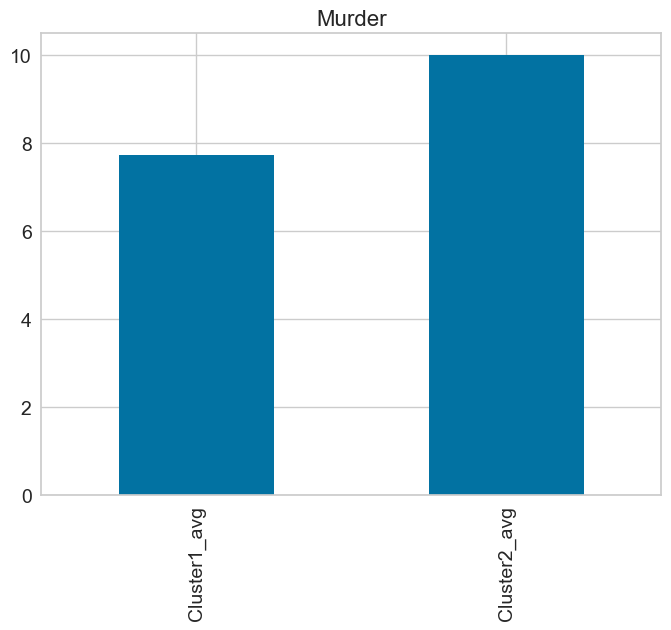

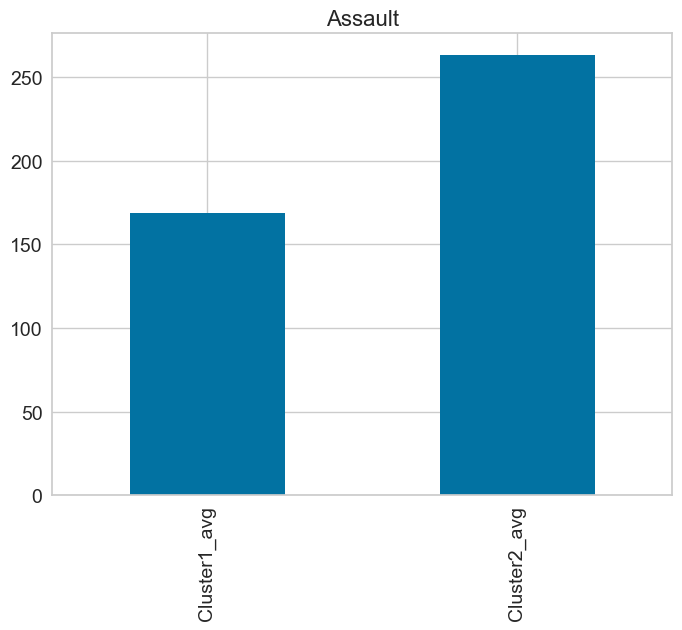

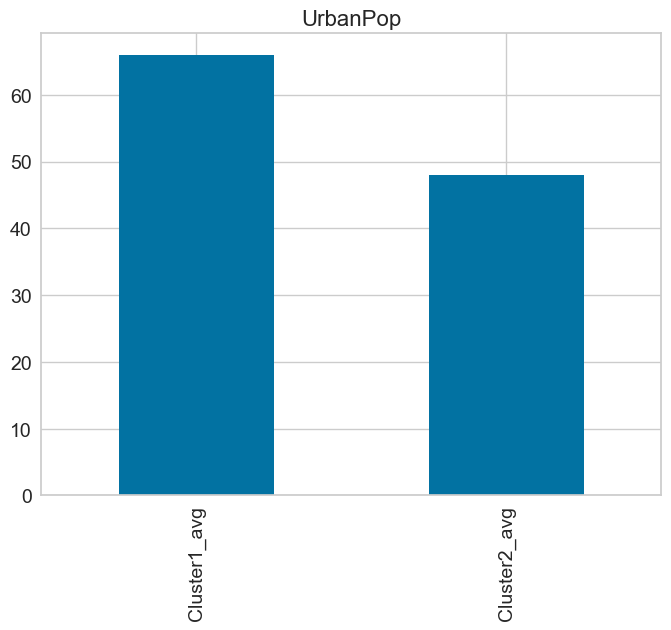

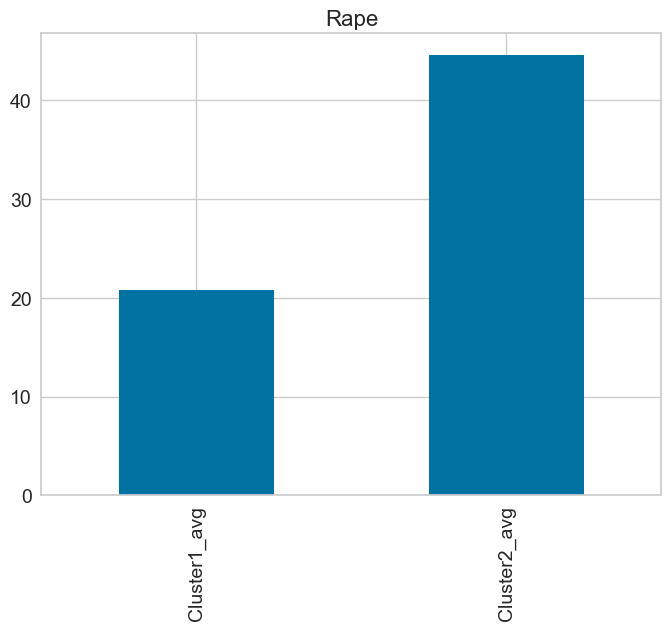

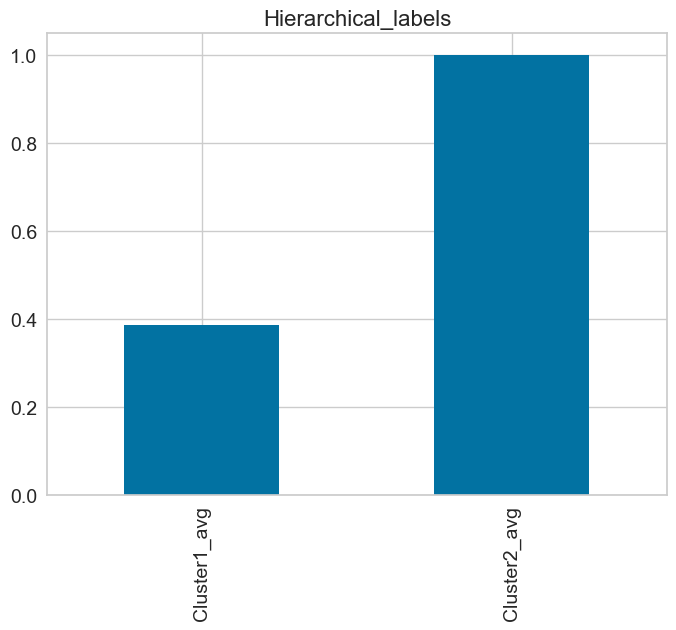

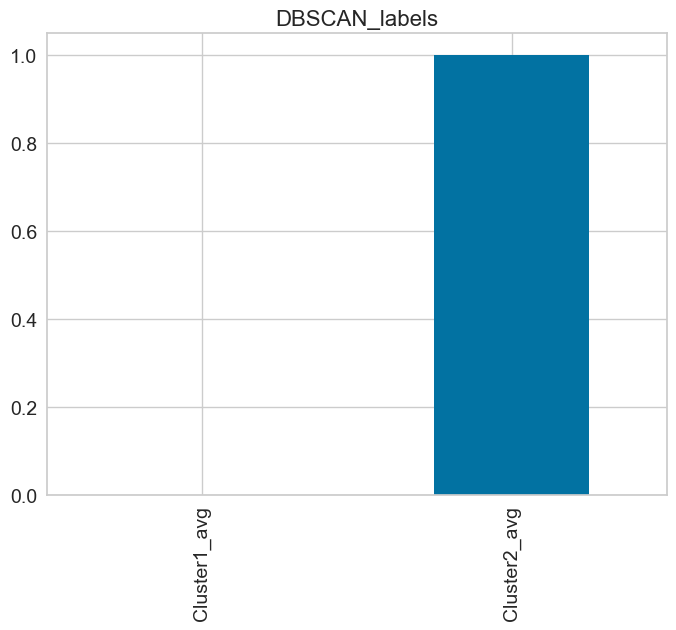

In [160]:
# Extract and plot one Column data .xs method
for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar',fontsize=14)
    plt.show()
    print()

### Observations:
+ #### The Cities in the Cluster-0 seems to be Safe-Zone where there are relativley less Murders,Assaults and Rapes.
+ #### The Cities in Cluster-1 seems to have higher crime rates and can be regarded as Danger-Zone.

# 9. Conclusion:<a class="anchor" id="9"></a>

##### I have applied EDA to analyze dataset.Discovered correlation between diff variables and found colinearity.
##### Applied Standardazation & MinMaxScalar transformation on the data t
##### I have used & analyzed two clustering techniques here..i) KMeans, ii) Hierarchical Clusterig & iii) DBSCAN.

##### By applying clustering on diff. PCA obtained with diff transformation data shows fluctuation in model score. So finally the Standard Scaler found less score so not used for further model building.

##### KMeans clustering is sensitive to outliers

[Table of Contents](#0.1)

![FilterMethod](https://miro.medium.com/proxy/1*tc8UF-h0nQqUfLC8-0uInQ.gif)